<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from scipy.stats import boxcox

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [3]:
df_world = pd.read_csv("Data/donnees_banque_mondiale.csv", sep=";")
df_price = pd.read_csv("Data/FAOSTAT_producers_price.csv", sep=";")
df_import_export = pd.read_csv("Data/FAOSTAT_import_export.csv", sep=";")
df_consumption = pd.read_csv("Data/FAOSTAT_import_export_consumption.csv", sep=";")
df_internet = pd.read_csv("Data/internet.csv", sep=";")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse world</h3>
</div>

In [4]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             266 non-null    object 
 1   PIB par habitant                 251 non-null    float64
 2   Year                             266 non-null    int64  
 3   Population totale                265 non-null    float64
 4   Taux d'urbanisation              263 non-null    float64
 5   Taux de chomage                  234 non-null    float64
 6   Taux d'inflation                 216 non-null    float64
 7   Dette publique (% du PIB)        54 non-null     float64
 8   Part des energies renouvelables  71 non-null     float64
 9   Taux de mortalite infantile      244 non-null    float64
 10  Taux d'electrification           263 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 23.0+ KB


In [5]:
df_world

,Area,PIB par habitant,Year,Population totale,Taux d'urbanisation,Taux de chomage,Taux d'inflation,Dette publique (% du PIB),Part des energies renouvelables,Taux de mortalite infantile,Taux d'electrification
0,Afghanistan,352.603733,2022,4.112877e+07,26.616000,14.100000,NaN,NaN,20.0,44.800000,85.300000
1,Africa Eastern and Southern,1642.432039,2022,7.208591e+08,37.825158,7.448222,10.883478,NaN,NaN,40.797625,48.711995
2,Africa Western and Central,1788.875347,2022,4.903309e+08,49.047385,3.737766,7.967574,NaN,NaN,59.130029,55.437577
3,Albania,6810.114041,2022,2.777689e+06,63.799000,11.588000,6.725203,NaN,NaN,8.400000,100.000000
4,Algeria,5023.252932,2022,4.490322e+07,74.772000,12.437000,9.265516,NaN,NaN,18.700000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,3799.955270,2022,5.043612e+06,77.291000,24.420000,3.741224,NaN,15.4,12.300000,100.000000
262,World,12730.157170,2022,7.951595e+09,56.901955,5.264616,7.985187,NaN,NaN,27.900000,91.352571
263,"Yemen, Rep.",698.850350,2022,3.369661e+07,39.188000,17.515000,NaN,NaN,NaN,33.100000,76.000000
264,Zambia,1456.901570,2022,2.001768e+07,45.761000,5.993000,10.993204,NaN,NaN,39.000000,47.800000


In [6]:
df_world.isnull().mean()

Area                               0.000000
PIB par habitant                   0.056391
Year                               0.000000
Population totale                  0.003759
Taux d'urbanisation                0.011278
Taux de chomage                    0.120301
Taux d'inflation                   0.187970
Dette publique (% du PIB)          0.796992
Part des energies renouvelables    0.733083
Taux de mortalite infantile        0.082707
Taux d'electrification             0.011278
dtype: float64

In [7]:
colonnes_avant = len(df_world.columns)
colonnes_manquantes = df_world.columns[df_world.isnull().mean() > 0.3]

print(colonnes_manquantes)


df_world = df_world.dropna(axis=1, thresh=int(len(df_world) * 0.7))

colonnes_apres = len(df_world.columns)
print(f"Le DataFrame a été nettoyé de {colonnes_avant - colonnes_apres} colonnes.")


Index(['Dette publique (% du PIB)', 'Part des energies renouvelables'], dtype='object')
Le DataFrame a été nettoyé de 2 colonnes.


In [8]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         266 non-null    object 
 1   PIB par habitant             251 non-null    float64
 2   Year                         266 non-null    int64  
 3   Population totale            265 non-null    float64
 4   Taux d'urbanisation          263 non-null    float64
 5   Taux de chomage              234 non-null    float64
 6   Taux d'inflation             216 non-null    float64
 7   Taux de mortalite infantile  244 non-null    float64
 8   Taux d'electrification       263 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.8+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse price</h3>
</div>

In [9]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code (M49)  94 non-null     int64  
 1   Area             94 non-null     object 
 2   Element Code     94 non-null     int64  
 3   Element          94 non-null     object 
 4   Year             94 non-null     int64  
 5   Unit             94 non-null     object 
 6   Value            94 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ KB


In [10]:
df_price.head()

,Area Code (M49),Area,Element Code,Element,Year,Unit,Value
0,8,Albania,5532,Producer Price (USD/tonne),2022,USD,3180.3
1,51,Armenia,5532,Producer Price (USD/tonne),2022,USD,6208.2
2,51,Armenia,5532,Producer Price (USD/tonne),2022,USD,1059.6
3,36,Australia,5532,Producer Price (USD/tonne),2022,USD,1615.9
4,40,Austria,5532,Producer Price (USD/tonne),2022,USD,3032.8


Pour l'instant on laisse de coté, pas assez de données

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse consommation</h3>
</div>

In [11]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area Code (M49)  2779 non-null   int64 
 1   Area             2779 non-null   object
 2   Element          2779 non-null   object
 3   Item             2779 non-null   object
 4   Year             2779 non-null   int64 
 5   Value            2779 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 130.4+ KB


In [12]:
df_consumption.head()

,Area Code (M49),Area,Element,Item,Year,Value
0,4,Afghanistan,Production,Poultry Meat,2022,29
1,4,Afghanistan,Import quantity,Poultry Meat,2022,7
2,4,Afghanistan,Stock Variation,Poultry Meat,2022,1
3,4,Afghanistan,Domestic supply quantity,Poultry Meat,2022,36
4,4,Afghanistan,Residuals,Poultry Meat,2022,0


In [13]:
df_pivot1 = df_consumption.pivot(index='Area', columns=['Element', 'Item'], values='Value').reset_index()
df_pivot1.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_pivot1.columns.values]
df_pivot1


,Area_,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,Residuals_Poultry Meat,Food_Poultry Meat,Production_Eggs,Import quantity_Eggs,Export quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Stock Variation_Eggs,Export quantity_Poultry Meat,Tourist consumption_Poultry Meat,Tourist consumption_Eggs,Losses_Poultry Meat
0,Afghanistan,29.0,7.0,1.0,36.0,0.0,36.0,22.0,13.0,0.0,35.0,3.0,0.0,29.0,NaN,NaN,NaN,NaN,NaN
1,Albania,18.0,47.0,0.0,64.0,0.0,64.0,49.0,2.0,1.0,51.0,8.0,0.0,43.0,0.0,NaN,NaN,NaN,NaN
2,Algeria,275.0,0.0,0.0,275.0,0.0,275.0,312.0,1.0,0.0,312.0,14.0,0.0,282.0,0.0,0.0,NaN,NaN,NaN
3,Angola,59.0,316.0,0.0,374.0,0.0,374.0,143.0,2.0,0.0,145.0,12.0,0.0,64.0,0.0,0.0,NaN,NaN,NaN
4,Antigua and Barbuda,0.0,7.0,0.0,7.0,0.0,6.0,1.0,0.0,NaN,1.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela (Bolivarian Republic of),426.0,23.0,0.0,449.0,0.0,449.0,178.0,0.0,NaN,178.0,9.0,0.0,169.0,0.0,NaN,NaN,NaN,NaN
185,Viet Nam,1249.0,270.0,43.0,1468.0,0.0,1468.0,436.0,6.0,4.0,438.0,39.0,0.0,370.0,0.0,7.0,NaN,NaN,NaN
186,Yemen,202.0,103.0,0.0,305.0,0.0,305.0,74.0,1.0,NaN,75.0,7.0,0.0,57.0,0.0,NaN,NaN,NaN,NaN
187,Zambia,51.0,57.0,0.0,99.0,0.0,99.0,66.0,0.0,2.0,65.0,6.0,0.0,56.0,0.0,9.0,NaN,NaN,NaN


In [14]:
colonnes_avant = len(df_pivot1.columns)
df_pivot1 = df_pivot1.dropna(axis=1, thresh=int(len(df_pivot1) * 0.7))
colonnes_apres = len(df_pivot1.columns)
print(f"Le DataFrame a été nettoyé de {colonnes_avant - colonnes_apres} colonnes.")

Le DataFrame a été nettoyé de 4 colonnes.


In [15]:
df_pivot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Area_                                  189 non-null    object 
 1   Production_Poultry Meat                186 non-null    float64
 2   Import quantity_Poultry Meat           189 non-null    float64
 3   Stock Variation_Poultry Meat           189 non-null    float64
 4   Domestic supply quantity_Poultry Meat  189 non-null    float64
 5   Residuals_Poultry Meat                 189 non-null    float64
 6   Food_Poultry Meat                      189 non-null    float64
 7   Production_Eggs                        185 non-null    float64
 8   Import quantity_Eggs                   189 non-null    float64
 9   Domestic supply quantity_Eggs          189 non-null    float64
 10  Losses_Eggs                            187 non-null    float64
 11  Residu

In [16]:
df_pivot1 = df_pivot1.rename(columns={'Area_': 'Area'})

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse import_export</h3>
</div>

In [17]:
df_import_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code (M49)  605 non-null    int64  
 1   Area             605 non-null    object 
 2   Element          605 non-null    object 
 3   Item             605 non-null    object 
 4   Year             605 non-null    int64  
 5   Value            605 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.5+ KB


In [18]:
df_import_export.head()

,Area Code (M49),Area,Element,Item,Year,Value
0,4,Afghanistan,Import Quantity,Chickens,2022,11927.00
1,4,Afghanistan,Import Quantity,"Meat of chickens, fresh or chilled",2022,6902.31
2,8,Albania,Import Quantity,Chickens,2022,8743.00
3,8,Albania,Import Quantity,"Meat of chickens, fresh or chilled",2022,43124.46
4,12,Algeria,Import Quantity,Chickens,2022,4619.00


In [19]:
df_pivot2 = df_import_export.pivot_table(index='Area', columns=['Element', 'Item'], values='Value')
df_pivot2.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_pivot2.columns.values]
df_pivot2.reset_index(inplace=True)
df_pivot2


,Area,Export Quantity_Chickens,"Export Quantity_Meat of chickens, fresh or chilled",Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled"
0,Afghanistan,NaN,NaN,11927.0,6902.31
1,Albania,NaN,NaN,8743.0,43124.46
2,Algeria,NaN,29.00,4619.0,NaN
3,Angola,1.0,10.87,35.0,308122.71
4,Antigua and Barbuda,1.0,5.84,1.0,6406.99
...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),NaN,NaN,21.0,7689.79
191,Viet Nam,29.0,2649.00,2088.0,267072.32
192,Yemen,NaN,NaN,NaN,103036.43
193,Zambia,2221.0,8929.99,343.0,54804.02


In [20]:
colonnes_avant = len(df_pivot2.columns)
df_pivot2 = df_pivot2.dropna(axis=1, thresh=int(len(df_pivot2) * 0.7))
colonnes_apres = len(df_pivot2.columns)
print(f"Le DataFrame a été nettoyé de {colonnes_avant - colonnes_apres} colonnes.")

Le DataFrame a été nettoyé de 2 colonnes.


In [21]:
df_pivot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Area                                                195 non-null    object 
 1   Import Quantity_Chickens                            182 non-null    float64
 2   Import Quantity_Meat of chickens, fresh or chilled  189 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse internet</h3>
</div>

In [22]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      264 non-null    object
 1   Internet  264 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [23]:
df_internet.head()

,Area,Internet
0,Afghanistan,18.4
1,Albania,82.61368583
2,Algeria,70.77
3,American Samoa,0
4,Andorra,93.89752157


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3 - Fusion</h2>
</div>

Verification Pays

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Verification des pays avant de les fusionner</h3>
</div>

In [24]:
# Uniformiser les noms de pays (par exemple, enlever les espaces inutiles et mettre en minuscules)
df_world = df_world.copy()
df_pivot1 = df_pivot1.copy()
df_pivot2 = df_pivot2.copy()
df_internet = df_internet.copy()
df_world['Area'] = df_world['Area'].str.strip().str.lower()
df_pivot1['Area'] = df_pivot1['Area'].str.strip().str.lower()
df_pivot2['Area'] = df_pivot2['Area'].str.strip().str.lower()
df_internet['Area'] = df_internet['Area'].str.strip().str.lower()


In [25]:
def harmoniser_pays_automatiquement(df_world, df_pivot1, df_pivot2, df_internet):
    # Dictionnaire de correspondance pour harmoniser les noms
    corrections = {
        'venezuela (bolivarian republic of)': 'venezuela, rb',
        'iran (islamic republic of)': 'iran, islamic rep.',
        'côte d\'ivoire': 'cote d\'ivoire',
        'united states of america': 'united states',
        'republic of korea': 'korea, rep.',
        'republic of moldova': 'moldova',
        'yemen': 'yemen, rep.',
        'congo, dem. rep.': 'democratic republic of the congo',
        'congo': 'congo, rep.',
        'lao pdr': "lao people's democratic republic",
        'egypt': 'egypt, arab rep.',
        'turkiye': 'türkiye',
        'kyrgyzstan': 'kyrgyz republic',
        'netherlands (kingdom of the)': 'netherlands',
        'slovakia': 'slovak republic',
        'saint lucia': 'st. lucia',
        'saint vincent and the grenadines': 'st. vincent and the grenadines',
        'saint kitts and nevis': 'st. kitts and nevis',
        'macao sar, china': 'china, macao sar',
        'hong kong sar, china': 'china, hong kong sar',
        'gambia': 'gambia, the',
        'tanzania': 'united republic of tanzania',
        'bolivia (plurinational state of)': 'bolivia',
        'bahamas': 'bahamas, the',
        'micronesia (federated states of)': 'micronesia, fed. sts.',
        'united kingdom of great britain and northern ireland': 'united kingdom',
        'china, mainland': 'china',
        'china, taiwan province of': 'taiwan',
    }

    # Appliquer les corrections sur tous les DataFrames
    df_world['Area'] = df_world['Area'].replace(corrections)
    df_pivot1['Area'] = df_pivot1['Area'].replace(corrections)
    df_pivot2['Area'] = df_pivot2['Area'].replace(corrections)
    df_internet['Area'] = df_internet['Area'].replace(corrections)

    # Liste des classifications/groupements à exclure
    classifications_a_supprimer = [
        'world', 'sub-saharan africa', 'latin america & caribbean', 'north america', 'caribbean small states',
        'pacific island small states', 'arab world', 'european union', 'oecd members', 'high income', 
        'low & middle income', 'lower middle income', 'upper middle income', 'low income', 'middle income',
        'east asia & pacific', 'south asia', 'africa eastern and southern', 'africa western and central', 
        'central europe and the baltics', 'east asia & pacific (excluding high income)', 'latin america & caribbean (excluding high income)', 
        'middle east & north africa', 'middle east & north africa (excluding high income)', 
        'sub-saharan africa (excluding high income)', 'sub-saharan africa (ida & ibrd countries)', 
        'east asia & pacific (ida & ibrd countries)', 'europe & central asia', 'europe & central asia (excluding high income)', 
        'europe & central asia (ida & ibrd countries)', 'ida & ibrd total', 'ida total', 'ibrd only', 'ida blend', 'ida only',
        'least developed countries: un classification', 'heavily indebted poor countries (hipc)', 'other small states',
        'fragile and conflict affected situations', 'early-demographic dividend', 'late-demographic dividend', 'pre-demographic dividend', 
        'post-demographic dividend'
    ]

    # Supprimer ces classifications de tous les DataFrames
    df_world = df_world[~df_world['Area'].isin(classifications_a_supprimer)]
    df_pivot1 = df_pivot1[~df_pivot1['Area'].isin(classifications_a_supprimer)]
    df_pivot2 = df_pivot2[~df_pivot2['Area'].isin(classifications_a_supprimer)]
    df_internet = df_internet[~df_internet['Area'].isin(classifications_a_supprimer)]

    # Trouver les pays qui ne correspondent pas entre les DataFrames
    set_world = set(df_world['Area'])
    set_pivot1 = set(df_pivot1['Area'])
    set_pivot2 = set(df_pivot2['Area'])
    set_internet = set(df_internet['Area'])

    # Harmoniser : ne conserver que les pays qui sont présents dans tous les DataFrames
    pays_communs = set_world & set_pivot1 & set_pivot2 & set_internet

    # Filtrer les DataFrames pour ne conserver que les pays communs
    df_world_harmonise = df_world[df_world['Area'].isin(pays_communs)]
    df_pivot1_harmonise = df_pivot1[df_pivot1['Area'].isin(pays_communs)]
    df_pivot2_harmonise = df_pivot2[df_pivot2['Area'].isin(pays_communs)]
    df_internet_harmonise = df_internet[df_internet['Area'].isin(pays_communs)]

    return df_world_harmonise, df_pivot1_harmonise, df_pivot2_harmonise, df_internet_harmonise

# Appeler la fonction pour harmoniser les DataFrames
df_world_harmonise, df_pivot1_harmonise, df_pivot2_harmonise, df_internet_harmonise = harmoniser_pays_automatiquement(df_world, df_pivot1, df_pivot2, df_internet)

# Vérification finale
print("Nombre de pays harmonisés:", len(df_world_harmonise))

# Comparer les pays après corrections et suppressions
set_world = set(df_world_harmonise['Area'])
set_pivot2 = set(df_pivot2_harmonise['Area'])

print("Présents dans df_world mais pas dans df_pivot2:", set_world - set_pivot2)
print("Présents dans df_pivot2 mais pas dans df_world:", set_pivot2 - set_world)


Nombre de pays harmonisés: 185
Présents dans df_world mais pas dans df_pivot2: set()
Présents dans df_pivot2 mais pas dans df_world: set()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Fusion</h3>
</div>

In [26]:
# Fusion entre df_world_harmonise et df_pivot1_harmonise
df_merge_1 = df_world_harmonise.merge(df_pivot1_harmonise, on='Area', how='outer', indicator=True)

# Afficher les résultats pour voir d'où proviennent les lignes non fusionnées
print(df_merge_1['_merge'].value_counts())
del df_merge_1['_merge']
# Fusion entre df_merge_1 et df_pivot2_harmonise
df_merge_2 = df_merge_1.merge(df_pivot2_harmonise, on='Area', how='outer', indicator=True)

# Afficher les résultats pour voir les lignes non fusionnées après la deuxième fusion
print(df_merge_2['_merge'].value_counts())
del df_merge_2['_merge']
# Fusion finale avec df_internet_harmonise
df_final = df_merge_2.merge(df_internet_harmonise, on='Area', how='outer', indicator=True)

# Afficher les résultats pour la fusion finale
print(df_final['_merge'].value_counts())
del df_final['_merge']
del df_final['Year']

_merge
both          186
left_only       0
right_only      0
Name: count, dtype: int64
_merge
both          188
left_only       0
right_only      0
Name: count, dtype: int64
_merge
both          188
left_only       0
right_only      0
Name: count, dtype: int64


In [27]:
df_final

,Area,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux d'inflation,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,...,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Stock Variation_Eggs,Export quantity_Poultry Meat,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",Internet
0,afghanistan,352.603733,41128771.0,26.616,14.100,NaN,44.8,85.3,29.0,7.0,...,13.0,35.0,3.0,0.0,29.0,NaN,NaN,11927.0,6902.31,18.4
1,albania,6810.114041,2777689.0,63.799,11.588,6.725203,8.4,100.0,18.0,47.0,...,2.0,51.0,8.0,0.0,43.0,0.0,NaN,8743.0,43124.46,82.61368583
2,algeria,5023.252932,44903225.0,74.772,12.437,9.265516,18.7,100.0,275.0,0.0,...,1.0,312.0,14.0,0.0,282.0,0.0,0.0,4619.0,NaN,70.77
3,angola,2933.484644,35588987.0,68.081,14.693,21.355290,45.7,48.5,59.0,316.0,...,2.0,145.0,12.0,0.0,64.0,0.0,0.0,35.0,308122.71,32.60230173
4,antigua and barbuda,19919.726690,93763.0,24.346,NaN,7.531078,8.1,100.0,0.0,7.0,...,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,6406.99,95.66338947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"venezuela, rb",NaN,28301696.0,88.378,5.747,NaN,21.2,100.0,426.0,23.0,...,0.0,178.0,9.0,0.0,169.0,0.0,NaN,21.0,7689.79,61.6
184,viet nam,4179.011790,98186856.0,38.766,1.535,3.156508,16.2,100.0,1249.0,270.0,...,6.0,438.0,39.0,0.0,370.0,0.0,7.0,2088.0,267072.32,78.58999918
185,"yemen, rep.",698.850350,33696614.0,39.188,17.515,NaN,33.1,76.0,202.0,103.0,...,1.0,75.0,7.0,0.0,57.0,0.0,NaN,NaN,103036.43,26.71835477
186,zambia,1456.901570,20017675.0,45.761,5.993,10.993204,39.0,47.8,51.0,57.0,...,0.0,65.0,6.0,0.0,56.0,0.0,9.0,343.0,54804.02,21.23153129


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Area                                                188 non-null    object 
 1   PIB par habitant                                    184 non-null    float64
 2   Population totale                                   188 non-null    float64
 3   Taux d'urbanisation                                 188 non-null    float64
 4   Taux de chomage                                     179 non-null    float64
 5   Taux d'inflation                                    164 non-null    float64
 6   Taux de mortalite infantile                         184 non-null    float64
 7   Taux d'electrification                              188 non-null    float64
 8   Production_Poultry Meat                             186 non-null    float64
 9  

In [29]:
colonnes_avant = len(df_final.columns)
colonnes_manquantes = df_final.columns[df_final.isnull().mean() > 0.1]

print(colonnes_manquantes)


df_final = df_final.dropna(axis=1, thresh=int(len(df_final) * 0.9))

colonnes_apres = len(df_final.columns)
print(f"Le DataFrame a été nettoyé de {colonnes_avant - colonnes_apres} colonnes.")

Index(['Taux d'inflation', 'Stock Variation_Eggs',
       'Export quantity_Poultry Meat'],
      dtype='object')
Le DataFrame a été nettoyé de 3 colonnes.


In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Area                                                188 non-null    object 
 1   PIB par habitant                                    184 non-null    float64
 2   Population totale                                   188 non-null    float64
 3   Taux d'urbanisation                                 188 non-null    float64
 4   Taux de chomage                                     179 non-null    float64
 5   Taux de mortalite infantile                         184 non-null    float64
 6   Taux d'electrification                              188 non-null    float64
 7   Production_Poultry Meat                             186 non-null    float64
 8   Import quantity_Poultry Meat                        188 non-null    float64
 9  

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Remplir les NaN</h3>
</div>

In [31]:
from sklearn.impute import KNNImputer

# Initialisation de l'imputeur KNN avec k voisins
imputer = KNNImputer(n_neighbors=5)

# Imputation sur les données numériques
df_final_numeric = df_final.select_dtypes(include=[float])

# Appliquer KNN Imputer sur les colonnes numériques uniquement
df_final_imputed = pd.DataFrame(imputer.fit_transform(df_final_numeric), columns=df_final_numeric.columns)

# Réinjecter les valeurs imputées dans le DataFrame original
df_final.update(df_final_imputed)


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Area                                                188 non-null    object 
 1   PIB par habitant                                    188 non-null    float64
 2   Population totale                                   188 non-null    float64
 3   Taux d'urbanisation                                 188 non-null    float64
 4   Taux de chomage                                     188 non-null    float64
 5   Taux de mortalite infantile                         188 non-null    float64
 6   Taux d'electrification                              188 non-null    float64
 7   Production_Poultry Meat                             188 non-null    float64
 8   Import quantity_Poultry Meat                        188 non-null    float64
 9  

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Analyes univariées</h3>
</div>

In [33]:
df_final.describe()

,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,Residuals_Poultry Meat,Food_Poultry Meat,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled"
count,188.000000,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,1.880000e+02
mean,16005.553254,6.444529e+07,59.862952,7.396024,19.354255,86.428191,1117.632979,120.250000,2.441489,1120.824468,-9.478723,1118.712766,1043.293617,20.441489,1043.797872,53.646809,-1.803191,942.643617,8719.337234,1.018424e+05
std,22030.802319,2.287921e+08,22.485022,5.728456,17.792209,24.084863,3940.133177,288.627614,29.072320,3880.953650,63.667876,3936.001158,4980.312477,65.927945,4972.582673,264.583508,9.275844,4574.603575,38959.097253,2.536923e+05
min,259.025031,1.131200e+04,13.582000,0.130000,1.500000,8.400000,0.000000,0.000000,-201.000000,0.000000,-440.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,-101.000000,0.000000,0.000000,0.000000e+00
25%,2243.836344,2.559982e+06,43.081750,3.545000,4.975000,84.400000,10.000000,4.000000,0.000000,35.500000,0.000000,34.750000,5.750000,0.000000,9.500000,0.000000,0.000000,7.750000,59.000000,4.118180e+03
50%,6861.582423,1.004727e+07,60.215500,5.561000,12.800000,100.000000,77.000000,21.000000,0.000000,117.500000,0.000000,116.500000,53.500000,2.000000,56.000000,2.000000,0.000000,45.000000,586.000000,1.714263e+04
75%,19987.824241,3.396606e+07,77.789500,10.560750,30.125000,100.000000,382.750000,90.250000,1.000000,411.000000,0.000000,384.000000,182.500000,10.250000,194.500000,9.250000,0.000000,168.250000,3046.250000,7.721490e+04
max,125006.021800,1.417173e+09,100.000000,37.852000,76.000000,100.000000,24194.000000,1871.000000,170.000000,25364.000000,12.000000,25786.000000,34326.000000,633.000000,34384.000000,1830.000000,1.000000,31669.000000,470533.000000,1.757302e+06


In [34]:
# Création des boxplots interactifs pour chaque colonne
for col in df_final.columns:
    if col == 'Area':  # On évite de faire un boxplot pour la colonne Area elle-même
        continue
    
    # Création du boxplot interactif avec les informations sur les outliers
    fig = px.box(df_final, y=col, hover_data=['Area'], title=f"Boxplot interactif de {col}")

    # Affichage du graphique interactif
    fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Correlation entre les données</h3>
</div>

In [35]:
df_valeurs = df_final.select_dtypes(include=['float64', 'int64'])

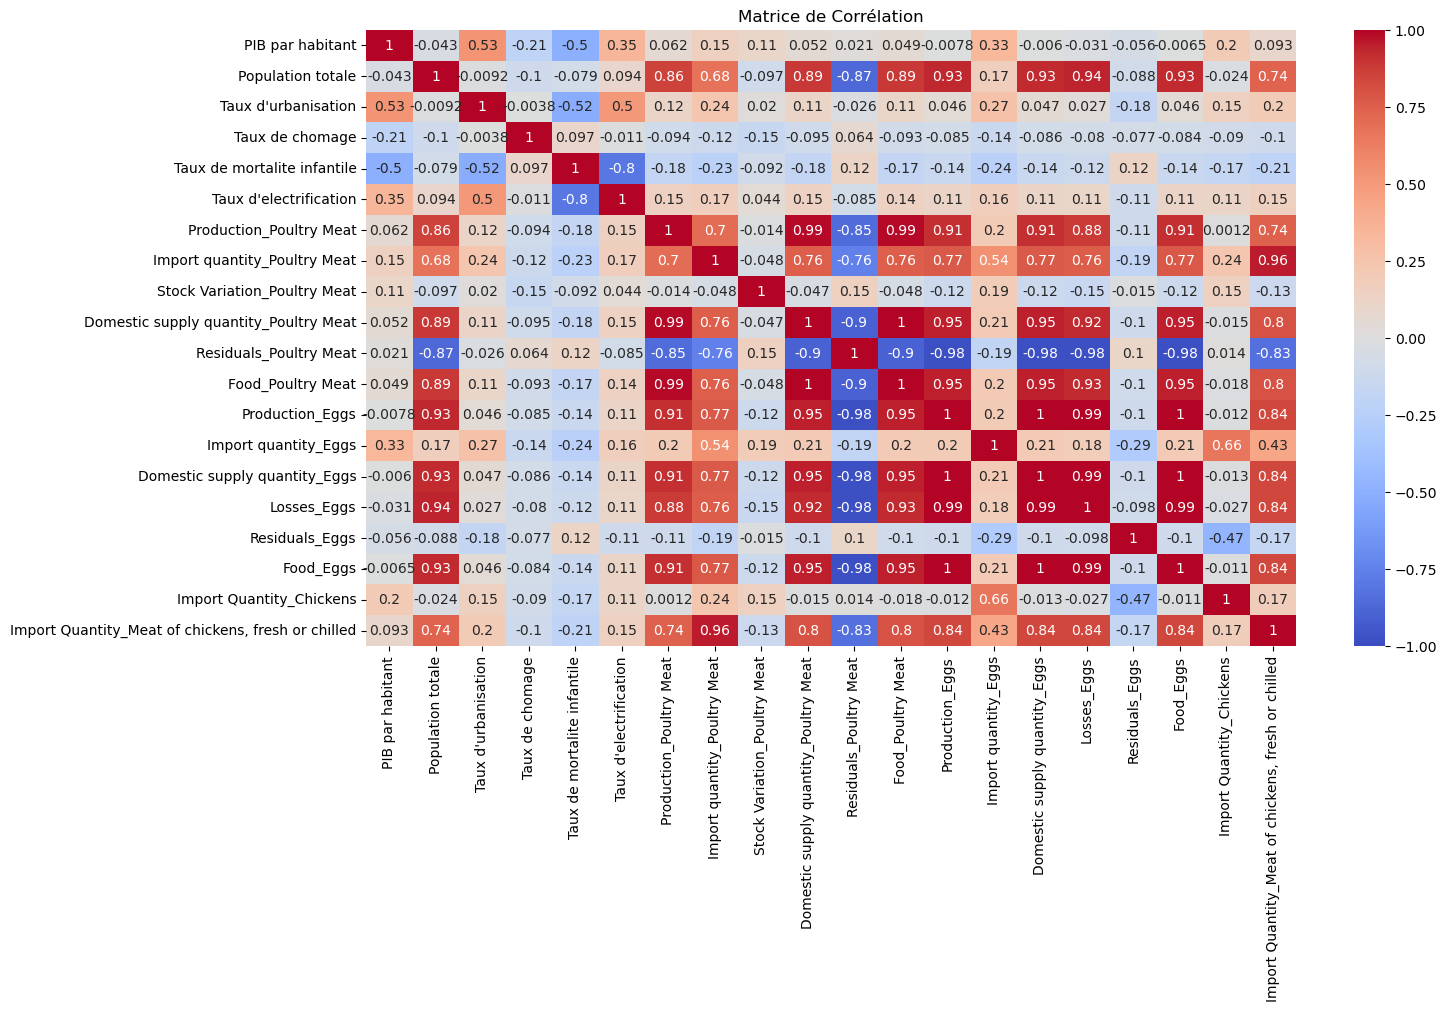

In [36]:
correlation_matrix = df_valeurs.corr(method='pearson')
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1 - Standardisation des données</h3>
</div>

In [37]:
# Séparer les colonnes numériques et non numériques
df_valeurs = df_final.select_dtypes(include=['float64', 'int64']).columns
df_pays = df_final.select_dtypes(exclude=['float64', 'int64']).columns

# Appliquer StandardScaler sur les colonnes numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final[df_valeurs])

# Convertir les données standardisées en DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_valeurs)

# Concaténer les colonnes non numériques avec les colonnes standardisées
df_final_scaled = pd.concat([scaled_df, df_final[df_pays].reset_index(drop=True)], axis=1)

# Résultat : df_final_scaled contient les colonnes numériques standardisées et les colonnes non numériques inchangées
df_final_scaled.head()

,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",Area,Internet
0,-0.712400,-0.102184,-1.482575,1.173419,1.433981,-0.046967,-0.277031,-0.393422,-0.049715,-0.280272,...,-0.205614,-0.113174,-0.203414,-0.191932,0.194916,-0.200254,0.082554,-0.375233,afghanistan,18.4
1,-0.418505,-0.270255,0.175519,0.733735,-0.617321,0.565004,-0.279830,-0.254465,-0.084204,-0.273038,...,-0.200178,-0.280469,-0.200187,-0.172984,0.194916,-0.197186,0.000609,-0.232072,albania,82.61368583
2,-0.499829,-0.085642,0.664836,0.882338,-0.036870,0.565004,-0.214430,-0.417739,-0.084204,-0.218524,...,-0.147229,-0.295677,-0.147560,-0.150246,0.194916,-0.144801,-0.105528,0.058867,algeria,70.77
3,-0.594939,-0.126461,0.366466,1.277213,1.484700,-1.578978,-0.269397,0.680021,-0.084204,-0.192947,...,-0.181253,-0.280469,-0.181233,-0.157825,0.194916,-0.192583,-0.223504,0.815283,angola,32.60230173
4,0.178143,-0.282017,-1.583801,0.870121,-0.634227,0.565004,-0.284411,-0.393422,-0.084204,-0.287764,...,-0.209842,-0.310886,-0.210269,-0.203301,0.194916,-0.206391,-0.224379,-0.377190,antigua and barbuda,95.66338947


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.2 - Transformation des données</h3>
</div>

Colonnes disponibles : Index(['PIB par habitant', 'Population totale', 'Taux d'urbanisation',
       'Taux de chomage', 'Taux de mortalite infantile',
       'Taux d'electrification', 'Production_Poultry Meat',
       'Import quantity_Poultry Meat', 'Stock Variation_Poultry Meat',
       'Domestic supply quantity_Poultry Meat', 'Residuals_Poultry Meat',
       'Food_Poultry Meat', 'Production_Eggs', 'Import quantity_Eggs',
       'Domestic supply quantity_Eggs', 'Losses_Eggs', 'Residuals_Eggs',
       'Food_Eggs', 'Import Quantity_Chickens',
       'Import Quantity_Meat of chickens, fresh or chilled'],
      dtype='object')


d:\Users\ZAPHAS\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

divide by zero encountered in log

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log



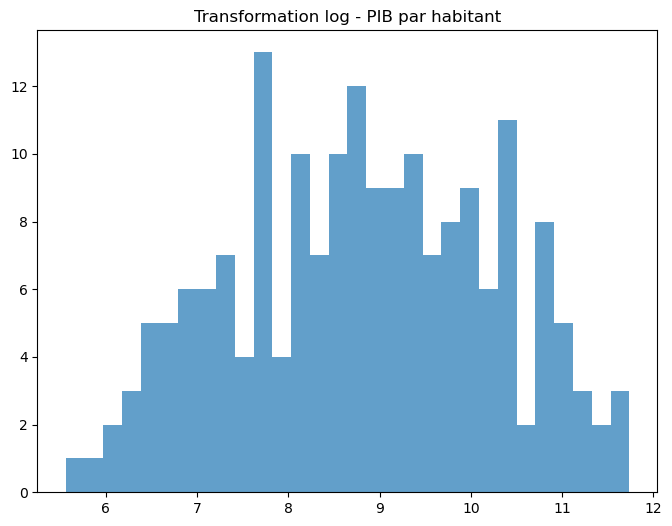

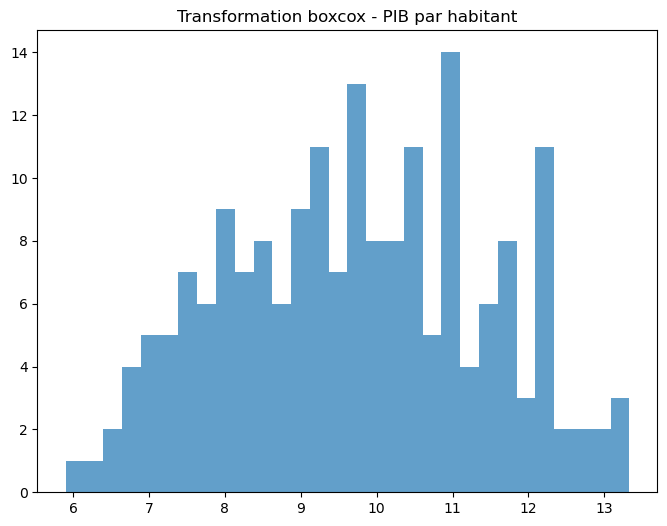

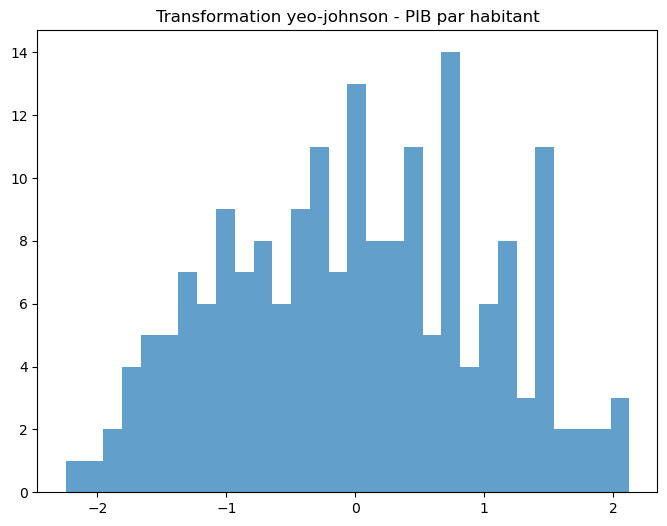

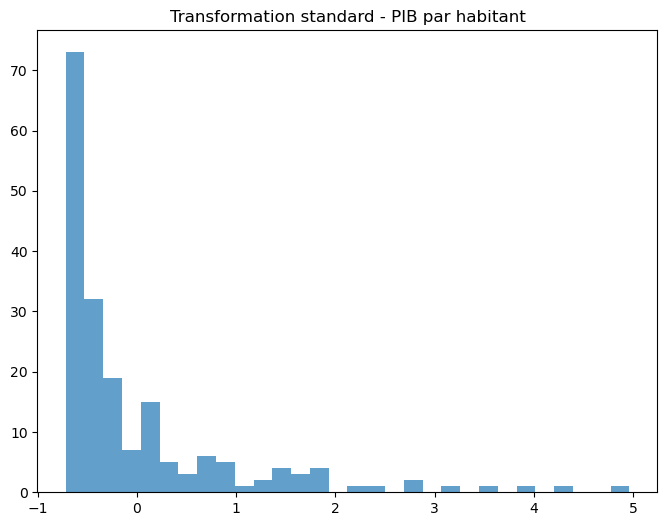

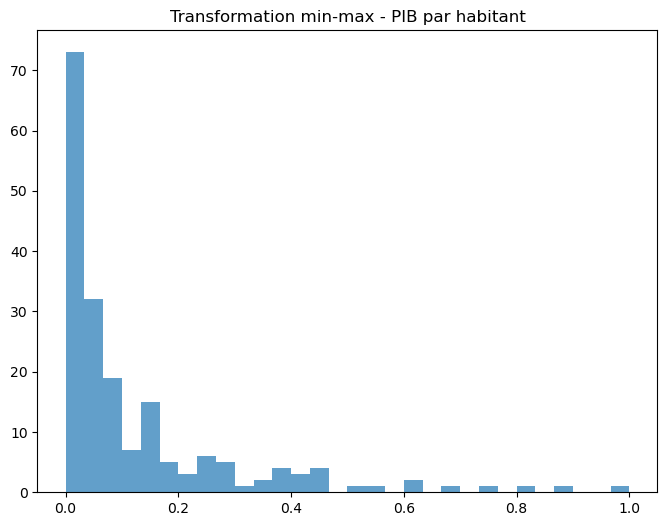

In [38]:
# Dictionnaire pour stocker les résultats
transformed_data = {}

# Sélectionner uniquement les colonnes numériques (float64, int64)
df_valeurs = df_final.select_dtypes(include=['float64', 'int64'])

# Transformation log
df_log = np.log(df_valeurs + 1)  # On applique log sur les valeurs, pas sur les noms de colonnes
transformed_data['log'] = df_log

# Box-Cox (gérer les valeurs négatives)
df_boxcox = df_valeurs.apply(lambda x: boxcox(x + 1)[0] if np.all(x > 0) else x)
transformed_data['boxcox'] = df_boxcox

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
df_yeo_johnson = pd.DataFrame(pt.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['yeo-johnson'] = df_yeo_johnson

# StandardScaler
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['standard'] = df_standard

# Min-Max Scaling
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['min-max'] = df_minmax

# Vérifier les colonnes disponibles après transformation
print("Colonnes disponibles :", df_valeurs.columns)

# Visualiser les transformations
for key, data in transformed_data.items():
    plt.figure(figsize=(8, 6))
    # Utilise le bon nom de colonne, par exemple, la première colonne du DataFrame transformé
    colonne_a_visualiser = df_valeurs.columns[0]  # Remplace par une colonne valide
    plt.hist(data[colonne_a_visualiser], bins=30, alpha=0.7)
    plt.title(f'Transformation {key} - {colonne_a_visualiser}')
    plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.3 - Standardisation des données</h3>
</div>

In [39]:
# Appliquer StandardScaler sur les colonnes numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_yeo_johnson)

# Convertir les données standardisées en DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_yeo_johnson.columns)

# Concaténer les colonnes non numériques avec les colonnes standardisées
df_final_scaled = pd.concat([scaled_df, df_final[df_pays].reset_index(drop=True)], axis=1)

# Résultat : df_final_scaled contient les colonnes numériques standardisées et les colonnes non numériques inchangées
df_final_scaled.head()

,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",Area,Internet
0,-2.042252,0.743500,-1.475524,1.237517,1.311239,-0.525156,-0.334264,-0.519741,-0.066525,-0.605348,...,-0.248511,0.960585,-0.248003,0.089735,0.400178,-0.111394,1.213002,-0.396693,afghanistan,18.4
1,-0.006360,-0.532560,0.168281,0.950390,-0.414133,0.653433,-0.521207,0.429184,-0.101163,-0.304836,...,0.098446,-0.028128,-0.169530,0.643238,0.400178,0.066792,1.092775,0.374076,albania,82.61368583
2,-0.221726,0.787621,0.662233,1.053330,0.388423,0.653433,0.551385,-1.714943,-0.101163,0.424036,...,0.847519,-0.388956,0.357450,0.923454,0.400178,0.859808,0.846745,0.866207,algeria,70.77
3,-0.598950,0.671165,0.360661,1.298366,1.332622,-1.831888,-0.053639,1.354202,-0.101163,0.571051,...,0.542021,-0.028128,0.100338,0.849629,0.400178,0.242858,-0.982883,1.403155,angola,32.60230173
4,0.764451,-1.939986,-1.573743,1.045113,-0.449170,0.653433,-1.765846,-0.519741,-0.101163,-1.472074,...,-1.469795,-1.136614,-0.646393,-1.274678,0.400178,-1.537970,-2.037339,-0.424717,antigua and barbuda,95.66338947


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - PCA</h3>
</div>

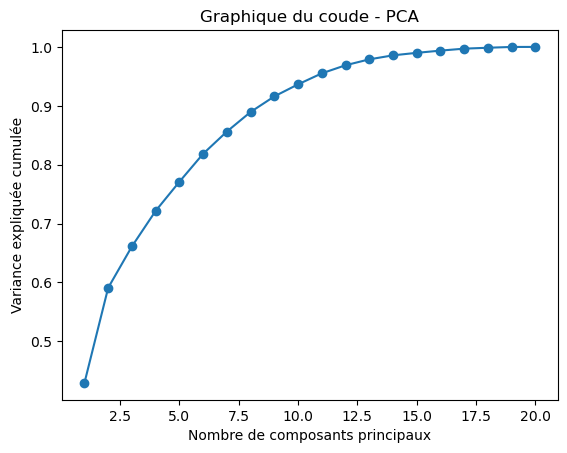

In [40]:
# Appliquer la PCA sur toutes les dimensions
pca = PCA().fit(scaled_data)

# Graphique du coude (variance expliquée par chaque composante)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Graphique du coude - PCA')
plt.xlabel('Nombre de composants principaux')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [41]:
# 2. Appliquer PCA
pca = PCA(n_components=4)  
pca_data = pca.fit_transform(scaled_data)

In [42]:
print(pca.explained_variance_ratio_)


[0.42923532 0.16158874 0.07027467 0.06035869]


In [43]:
print(pca.components_)


[[ 0.13865839  0.26656144  0.15794297 -0.07833064 -0.17156861  0.14242151
   0.30835166  0.20950504  0.04121263  0.32133986 -0.11361966  0.32022086
   0.31367929  0.19569551  0.2368121   0.27985717 -0.16465274  0.32488193
   0.15975194  0.20066109]
 [ 0.44743235 -0.31914412  0.34210404  0.07932794 -0.39723981  0.35721714
  -0.14559276  0.21206376  0.04741713 -0.11008565  0.05288177 -0.11819415
  -0.14954401  0.26525649 -0.11956284 -0.20658024 -0.05323192 -0.0977261
   0.02306661  0.17119179]
 [-0.13796447  0.02818397  0.0013806   0.25932881  0.19195377 -0.23038268
  -0.14539191  0.44721588 -0.3761763  -0.01042166 -0.38409113 -0.0059505
  -0.11074401  0.02145954  0.05613806 -0.08608634 -0.09824981 -0.07873268
  -0.15056988  0.50086524]
 [-0.14661387  0.05464879 -0.08671626 -0.26631484  0.14039495 -0.31008263
  -0.04968568  0.30366355  0.38932103 -0.0187663   0.34355285 -0.01775276
  -0.0709482   0.255215   -0.2196899  -0.10048586  0.02810537 -0.05653832
   0.45236604  0.28127333]]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Cercle de correlation PCA</h3>
</div>

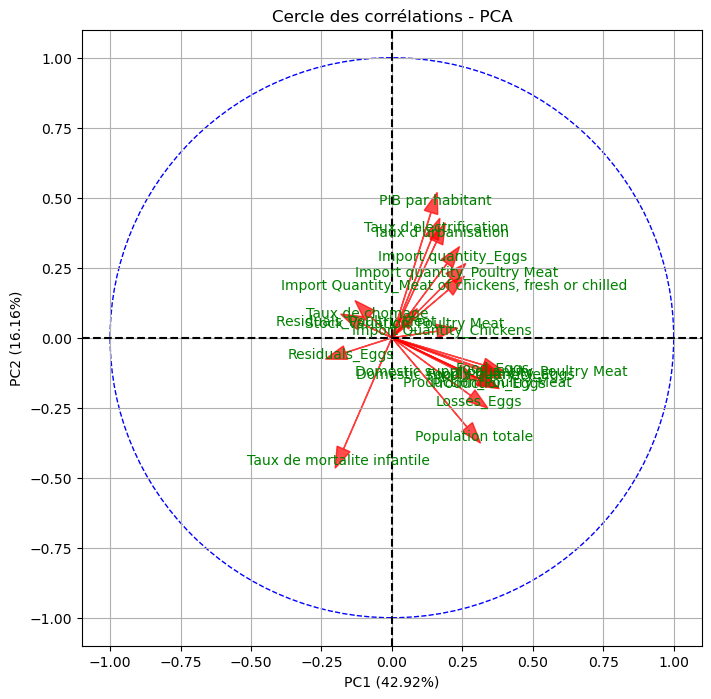

In [44]:
# 2. Récupérer les composantes et la variance expliquée
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# 3. Tracer le cercle de corrélation
plt.figure(figsize=(8, 8))

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Tracer les flèches pour chaque variable
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.7, head_width=0.05)
    plt.text(x * 1.1, y * 1.1, df_valeurs.columns[i], color='g', ha='center', va='center')

# Ajouter les étiquettes et un titre
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("Cercle des corrélations - PCA")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)

# Afficher le graphique
plt.show()

In [45]:
import plotly.graph_objs as go

# 3. Créer une figure Plotly pour le cercle de corrélation
fig = go.Figure()

# Tracer un cercle
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
fig.add_trace(go.Scatter(x=x_circle, y=y_circle, mode='lines', name='Cercle', line=dict(color='blue', dash='dash')))

# Tracer les flèches pour chaque variable
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    fig.add_trace(go.Scatter(x=[0, x], y=[0, y], mode='lines+text', 
                             name=df_valeurs.columns[i], 
                             text=[None, df_valeurs.columns[i]],
                             textposition="top center", 
                             marker=dict(color='red')))
    
# Ajouter des titres et ajuster les axes
fig.update_layout(
    title="Cercle des corrélations - PCA",
    xaxis_title=f"PC1 ({explained_variance[0]*100:.2f}%)",
    yaxis_title=f"PC2 ({explained_variance[1]*100:.2f}%)",
    xaxis=dict(range=[-1.2, 1.2], zeroline=True),
    yaxis=dict(range=[-1.2, 1.2], zeroline=True),
    showlegend=False,
    width=700,
    height=700
)

# Afficher le graphique
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - K means</h3>
</div>

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

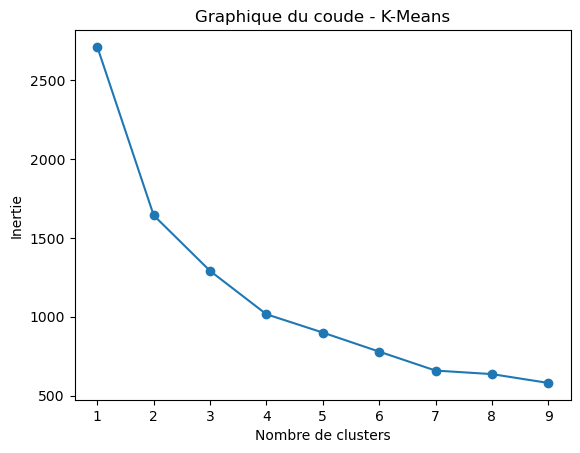

In [46]:
# Calculer l'inertie pour plusieurs valeurs de k (nombre de clusters)
inertias = []
K_range = range(1, 10)  # On teste pour 1 à 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

# Graphique du coude (Inertie vs nombre de clusters)
plt.plot(K_range, inertias, marker='o')
plt.title('Graphique du coude - K-Means')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


In [47]:
# 3. Appliquer K-Means sur les données réduites
kmeans = KMeans(n_clusters=4)
df_final_scaled['cluster_kmeans'] = kmeans.fit_predict(scaled_data)

d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - CAH</h3>
</div>

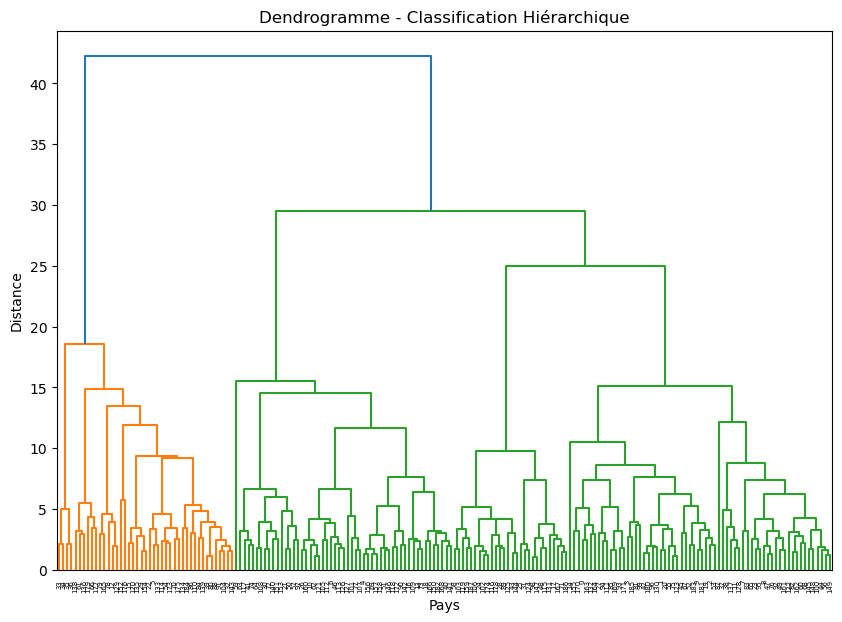

In [48]:
# Créer une matrice de distances à partir des données standardisées
distance_matrix = sch.linkage(scaled_data, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(distance_matrix)
plt.title('Dendrogramme - Classification Hiérarchique')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

In [49]:
from scipy.cluster.hierarchy import fcluster

df_final_scaled['cluster_cah'] = fcluster(distance_matrix, t=6, criterion='maxclust')  

# Visualiser les clusters obtenus
print(df_final_scaled[['Area', 'cluster_cah']])

                    Area  cluster_cah
0            afghanistan            6
1                albania            6
2                algeria            6
3                 angola            6
4    antigua and barbuda            3
..                   ...          ...
183        venezuela, rb            6
184             viet nam            2
185          yemen, rep.            6
186               zambia            5
187             zimbabwe            5

[188 rows x 2 columns]


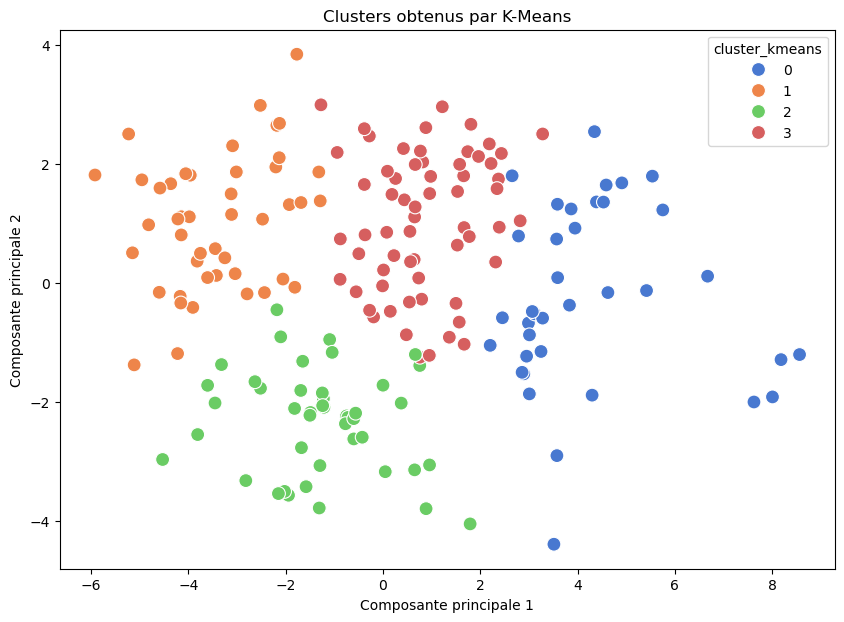

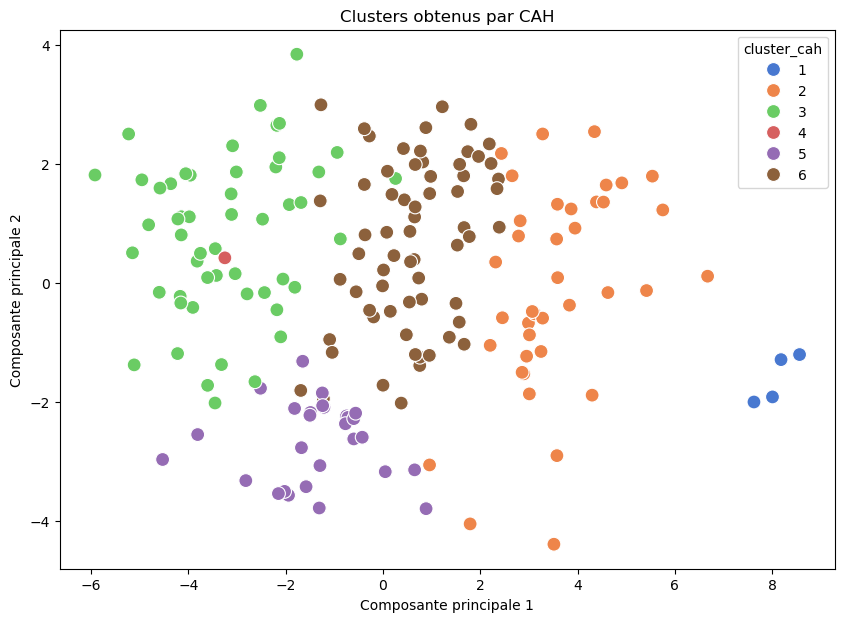

In [50]:
# Visualiser les clusters K-Means sur les deux premières composantes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['cluster_kmeans'], palette='muted', s=100)
plt.title('Clusters obtenus par K-Means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

# Visualiser les clusters CAH
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['cluster_cah'], palette='muted', s=100)
plt.title('Clusters obtenus par CAH')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5 - Resultats</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - K means</h3>
</div>

In [51]:
# Sélectionner uniquement les colonnes numériques pour calculer les moyennes
numeric_columns = df_final_scaled.select_dtypes(include=[np.number])

# Grouper les données par les clusters formés par K-Means
grouped_kmeans = numeric_columns.groupby(df_final_scaled['cluster_kmeans'])

# Calculer les statistiques descriptives (moyenne, écart-type, etc.) pour chaque cluster
cluster_means = grouped_kmeans.mean()

# Afficher les moyennes de chaque caractéristique pour chaque cluster
print("Moyenne des caractéristiques par cluster K-Means:")
display(cluster_means)

# Calculer la médiane pour chaque cluster
cluster_median = grouped_kmeans.median()
print("\nMédiane des caractéristiques par cluster K-Means:")
display(cluster_median)


Moyenne des caractéristiques par cluster K-Means:


,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",cluster_kmeans,cluster_cah
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.471319,1.180297,0.473941,-0.193293,-0.599184,0.596631,1.382758,0.898507,0.371230,1.390259,...,1.357539,0.645884,1.228624,1.202995,-0.954573,1.356161,0.471276,0.842355,0.0,1.891892
1,0.047453,-1.278909,-0.245040,0.627783,0.184432,0.055838,-1.232065,-0.493812,-0.097924,-1.189153,...,-1.243899,-0.611797,-0.571151,-1.193685,0.368489,-1.245077,-0.829872,-0.461358,1.0,3.088889
2,-1.207471,0.493375,-1.008413,-0.316945,1.181517,-1.362269,-0.134056,-0.600044,-0.056740,-0.193686,...,-0.096619,-0.618671,-0.203763,0.062451,0.335360,-0.214030,-0.075750,-0.529726,2.0,4.772727
3,0.541202,-0.126267,0.610663,-0.115369,-0.614781,0.570190,0.164183,0.248044,-0.110199,0.170879,...,0.161254,0.497656,-0.174060,0.104148,0.064216,0.246255,0.374840,0.208096,3.0,5.596774



Médiane des caractéristiques par cluster K-Means:


,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",cluster_kmeans,cluster_cah
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.436926,0.998223,0.678220,-0.219102,-0.811928,0.653433,1.294444,1.079186,-0.101163,1.289423,...,1.197282,0.960585,0.763598,1.346059,-1.490137,1.210098,0.414082,0.878834,0.0,2.0
1,0.060852,-1.199397,-0.133520,0.990341,0.120622,0.653433,-1.466580,-0.519741,-0.101163,-1.189157,...,-1.252473,-1.136614,-0.578394,-1.274678,0.400178,-1.304428,-0.917223,-0.439696,1.0,3.0
2,-1.232935,0.442397,-0.991648,-0.440102,1.203537,-1.803867,-0.078616,-0.780778,-0.101163,-0.163186,...,-0.105801,-1.136614,-0.271446,0.089735,0.400178,-0.240200,-0.093836,-0.570699,2.0,5.0
3,0.621568,-0.130341,0.596792,-0.151748,-0.651791,0.653433,0.258121,0.348554,-0.101163,0.181934,...,0.275126,0.660757,-0.055569,0.089735,0.400178,0.278530,0.567414,0.315546,3.0,6.0


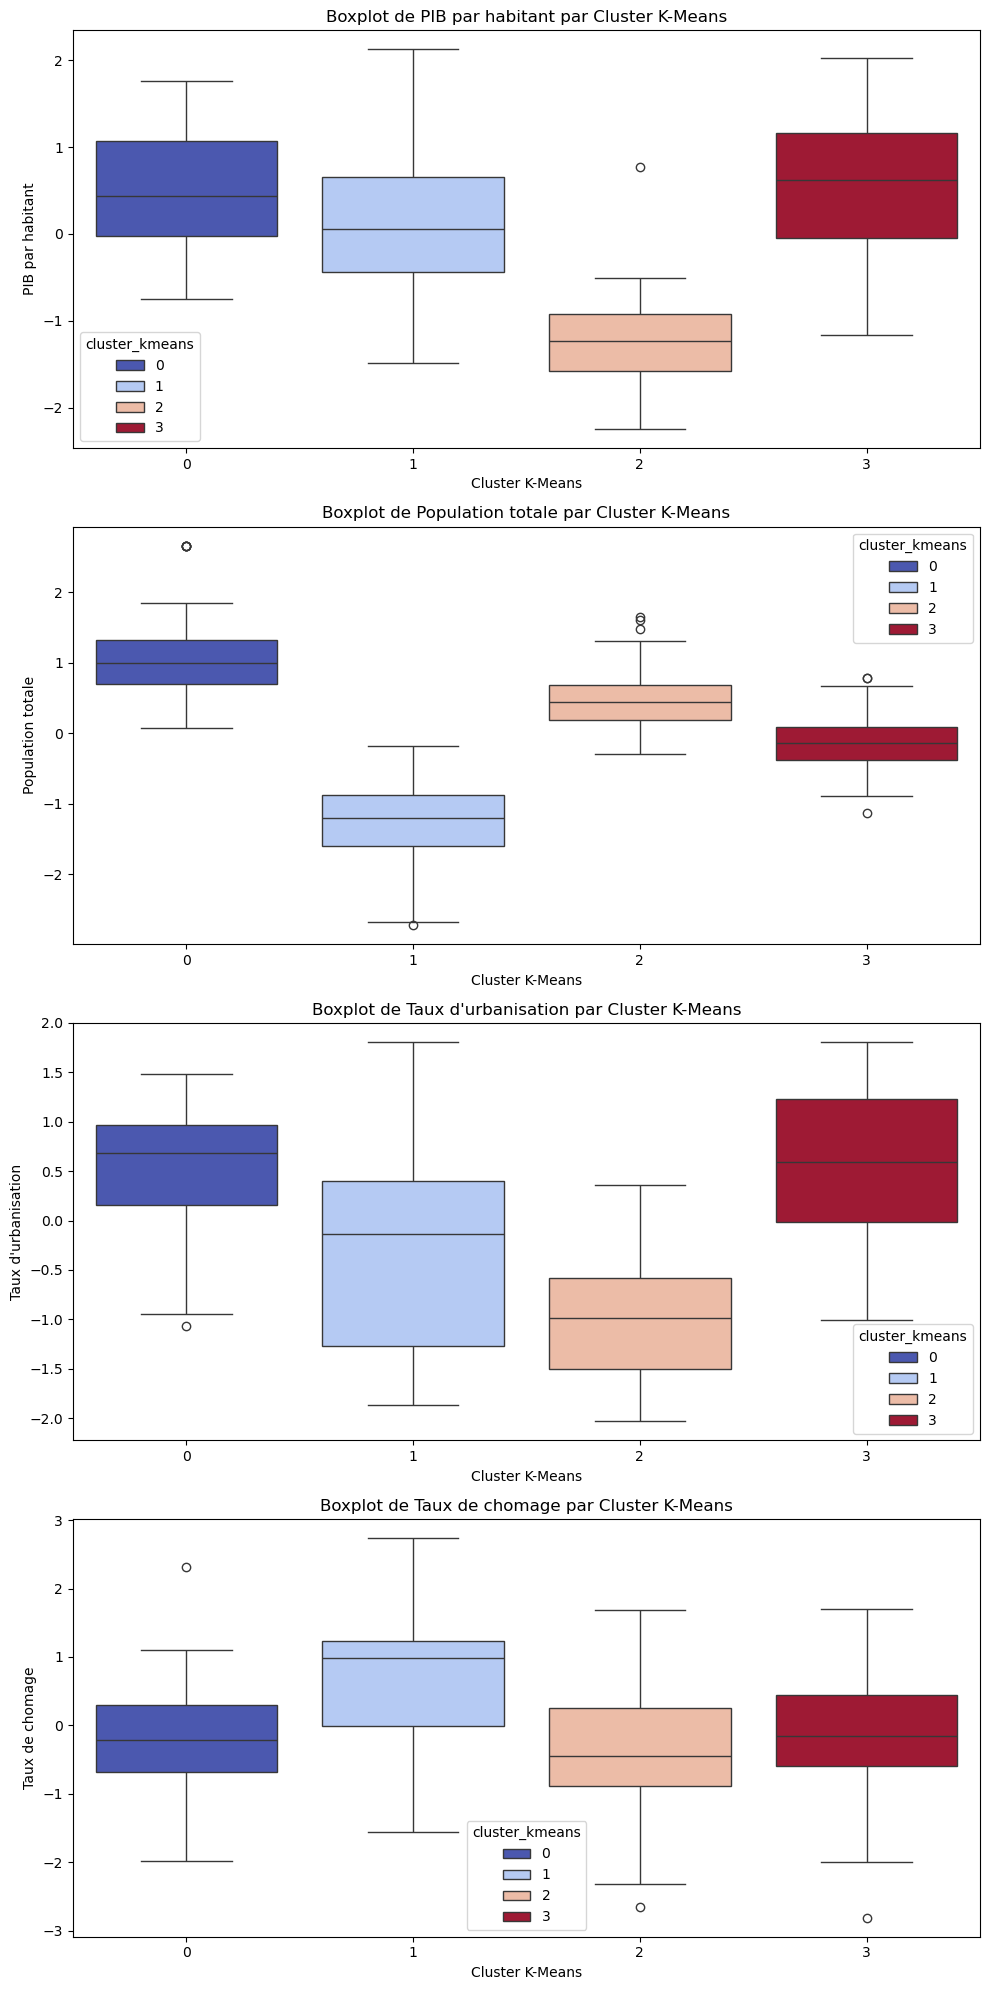

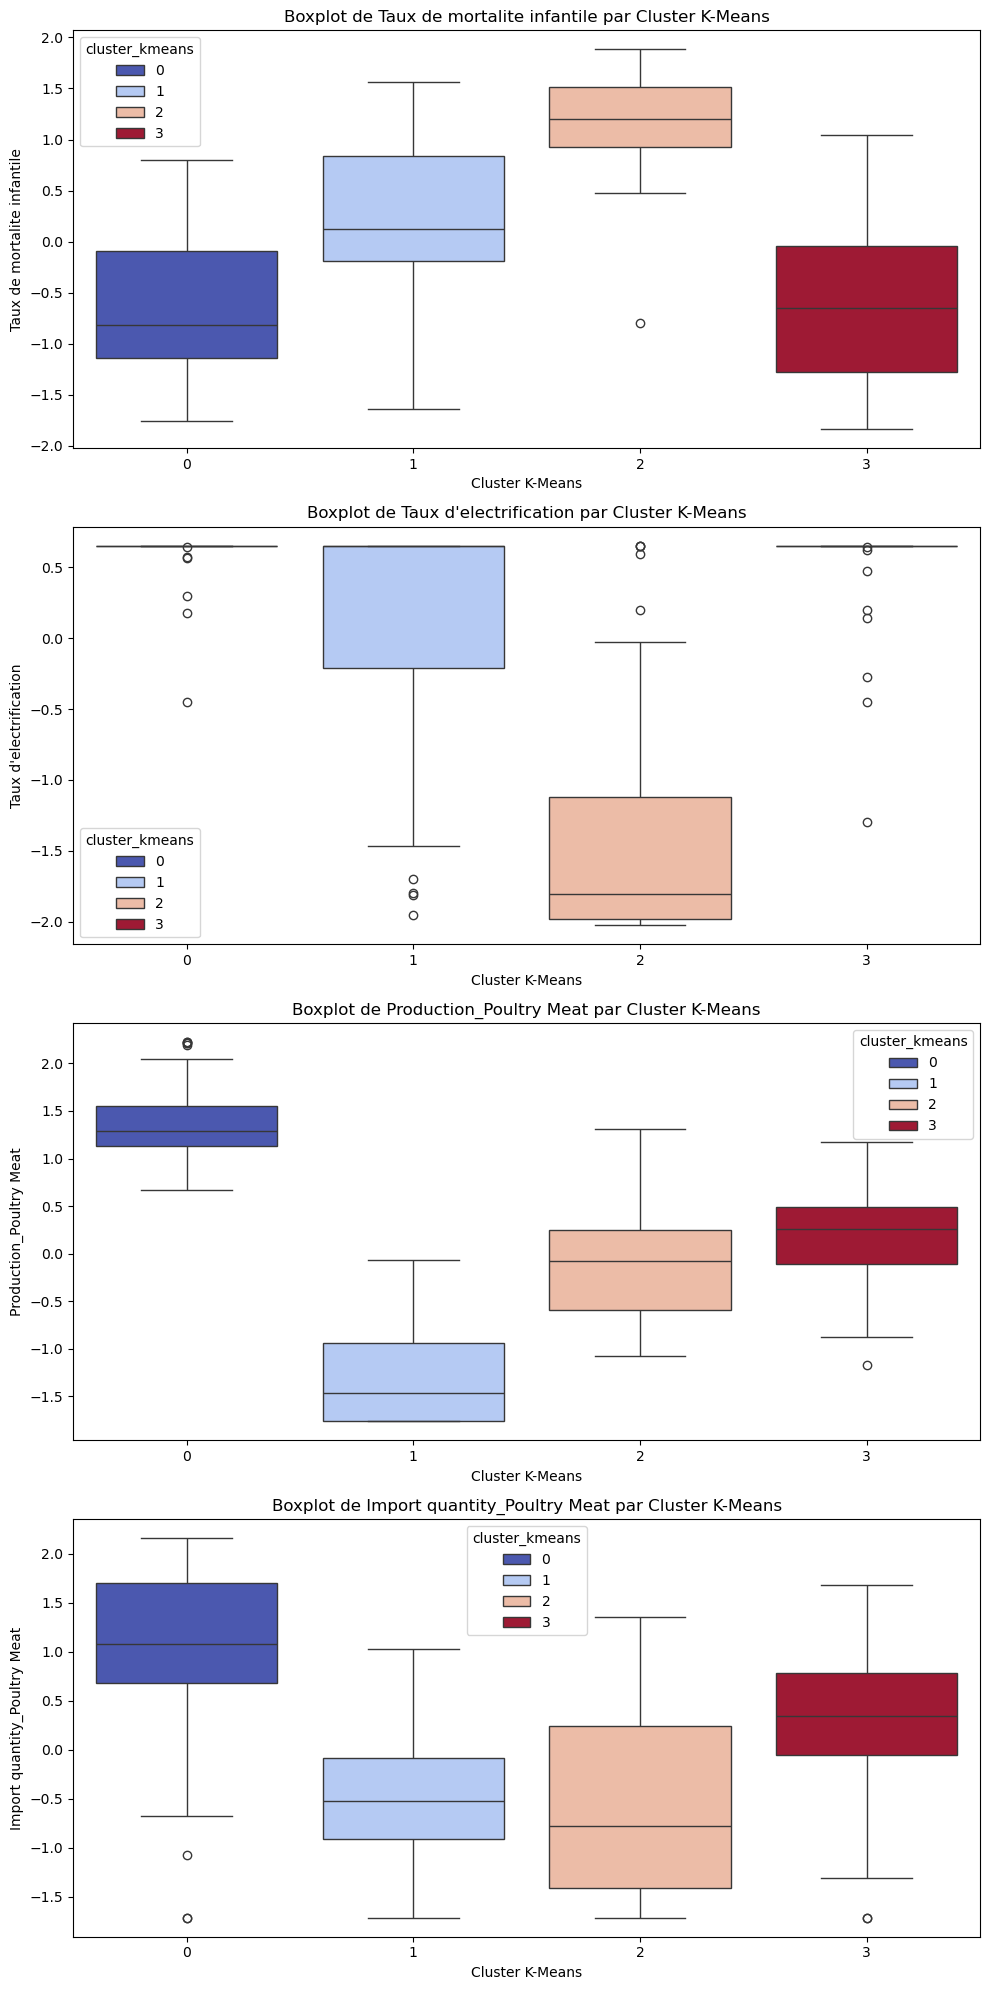

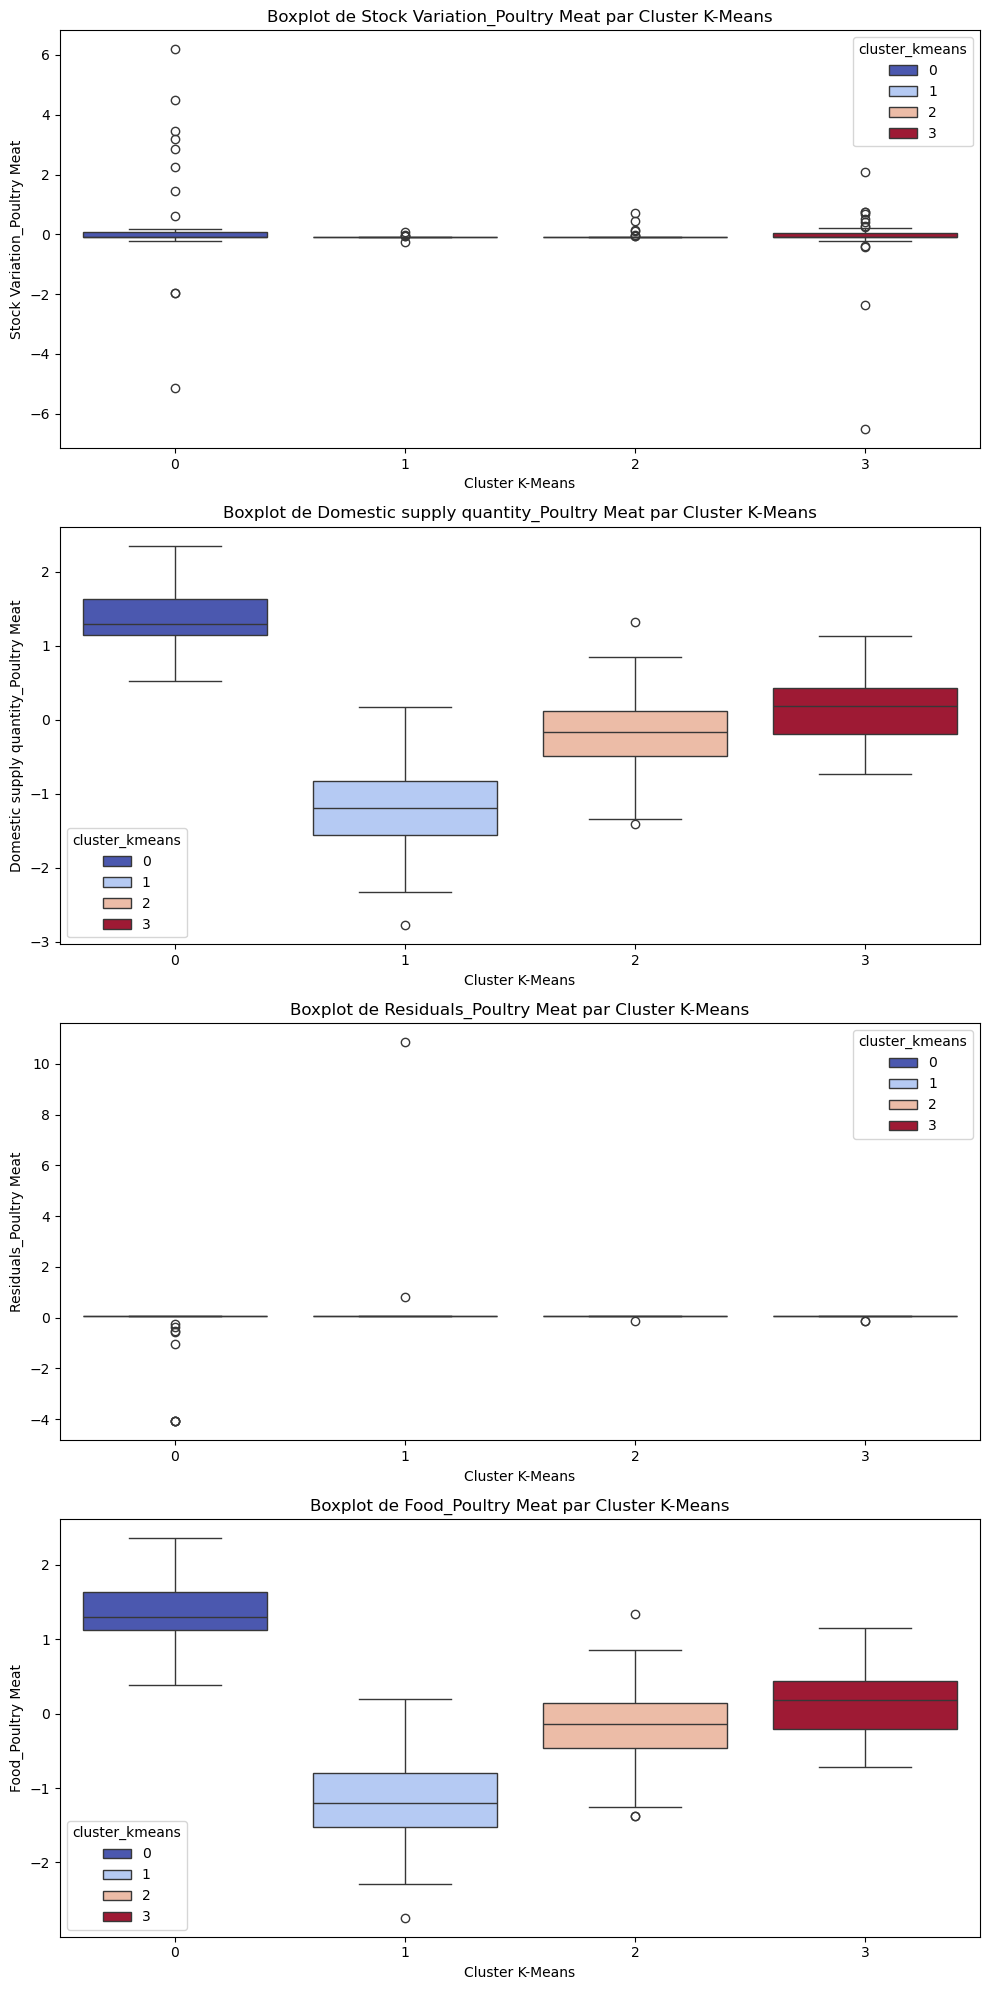

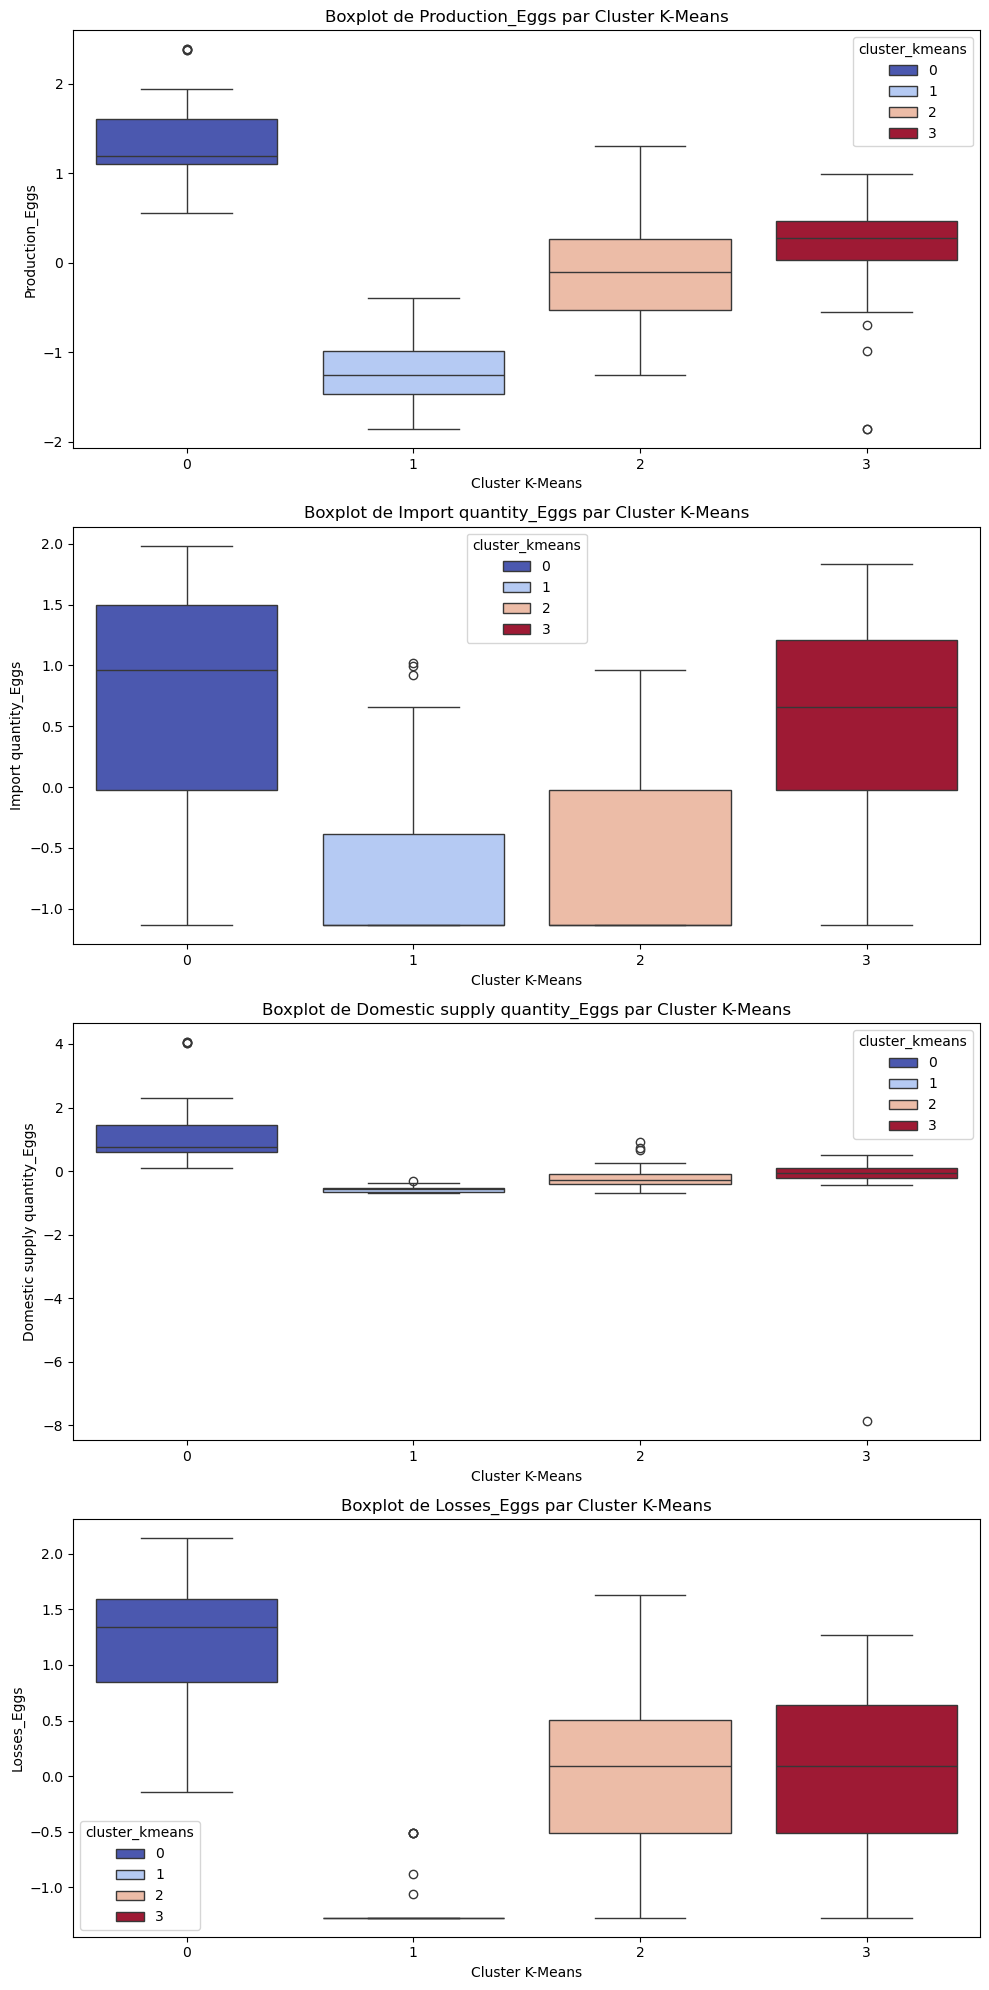

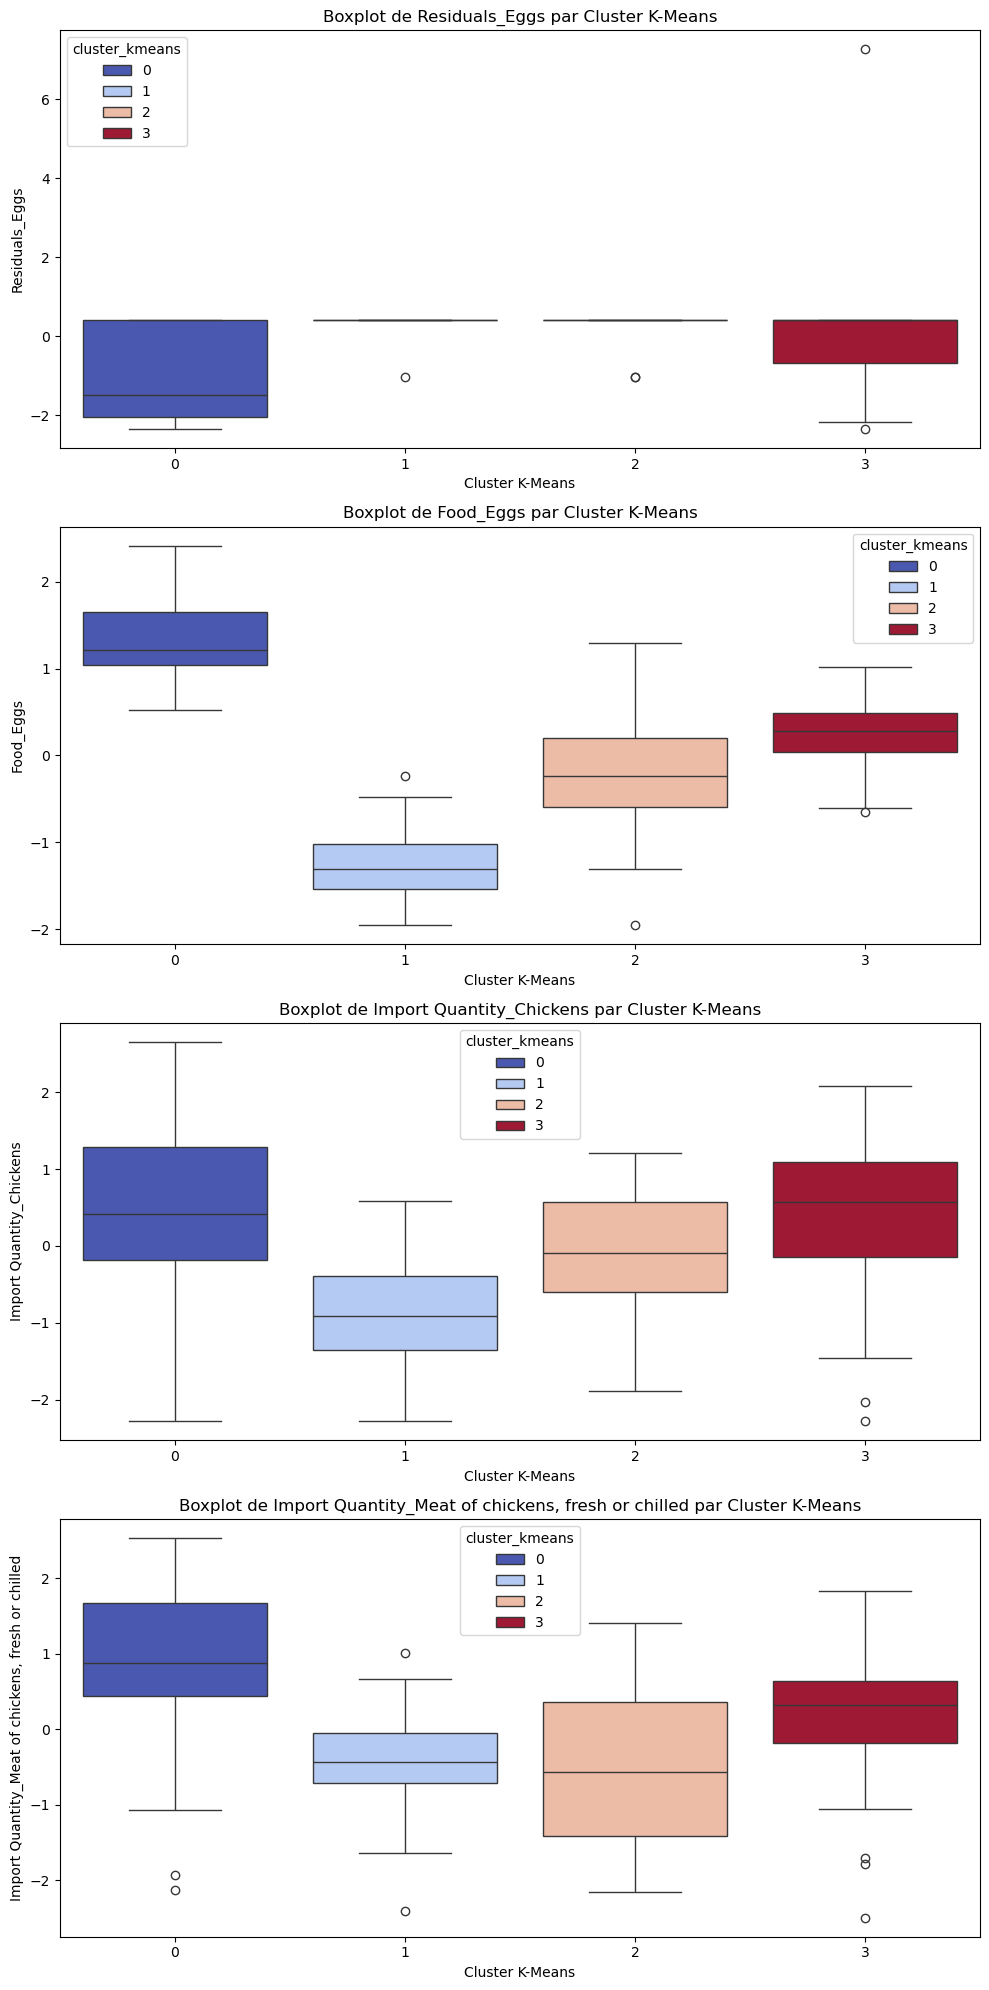

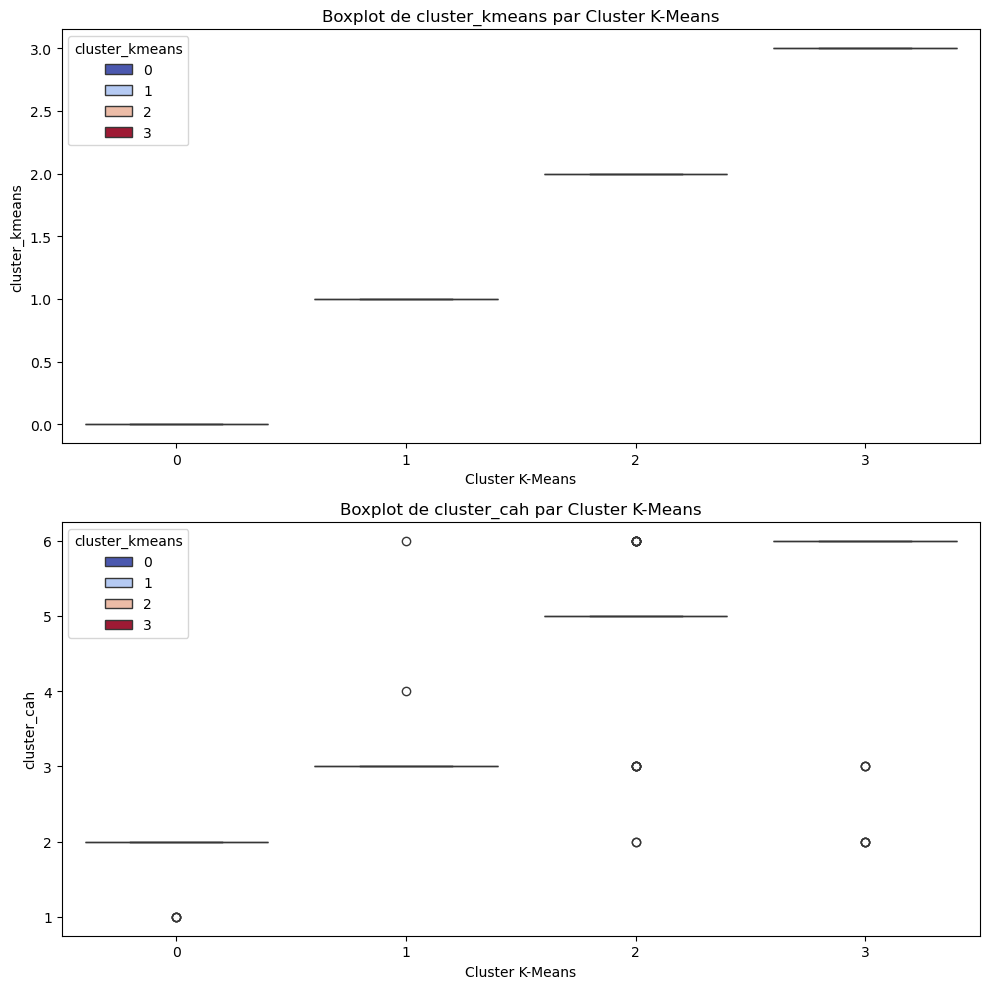

In [52]:
# Sélectionner les colonnes numériques
numeric_columns = df_final_scaled.select_dtypes(include=[np.number]).columns

# Nombre de colonnes par figure
cols_per_fig = 4

# Calculer le nombre de figures nécessaires
num_figs = int(np.ceil(len(numeric_columns) / cols_per_fig))

for i in range(num_figs):
    fig, axes = plt.subplots(nrows=min(cols_per_fig, len(numeric_columns) - i * cols_per_fig), ncols=1, figsize=(10, min(cols_per_fig, len(numeric_columns) - i * cols_per_fig) * 5))
    
    if len(numeric_columns) - i * cols_per_fig == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numeric_columns[i * cols_per_fig:(i + 1) * cols_per_fig]):
        sns.boxplot(x='cluster_kmeans', y=col, data=df_final_scaled,hue='cluster_kmeans', ax=ax, palette='coolwarm')
        ax.set_title(f'Boxplot de {col} par Cluster K-Means')
        ax.set_xlabel('Cluster K-Means')
        ax.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

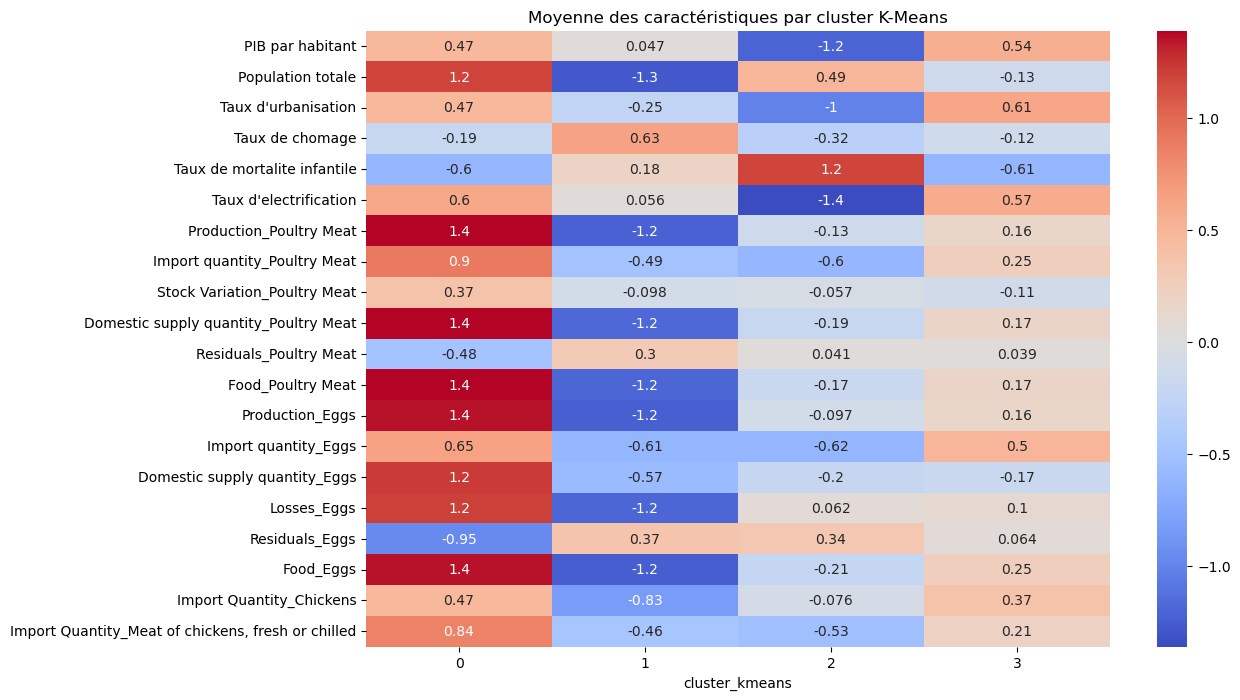

In [53]:
cluster_means_clean = cluster_means.drop(columns=['cluster_cah', 'cluster_kmeans'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_clean.T, annot=True, cmap="coolwarm")
plt.title("Moyenne des caractéristiques par cluster K-Means")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.3 - Test Kruskal</h4>
</div>

In [62]:
# Test de Kruskal-Wallis pour chaque variable numérique par cluster
kruskal_results = {}
for col in numeric_columns:
    # Groupes de données pour chaque cluster
    groups = [df_final_scaled[df_final_scaled['cluster_kmeans'] == cluster][col] for cluster in df_final_scaled['cluster_kmeans'].unique()]
    
    # Effectuer le test Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    kruskal_results[col] = p_value

# Extraire et trier les p-values
sorted_p_values = sorted(kruskal_results.items(), key=lambda item: item[1])

# Afficher les 10 variables avec les p-values les plus faibles
print("Les 10 variables avec les p-values les plus faibles :")
for feature, p_value in sorted_p_values[:10]:
    print(f"{feature}: p-value = {p_value}")


Les 10 variables avec les p-values les plus faibles :
cluster_kmeans: p-value = 2.7141315226339027e-40
Population totale: p-value = 1.9810782390426416e-31
Food_Eggs: p-value = 6.249618790713181e-31
Domestic supply quantity_Eggs: p-value = 4.9221438261396585e-30
Production_Eggs: p-value = 9.21828507851413e-30
cluster_cah: p-value = 9.967033534620096e-30
Production_Poultry Meat: p-value = 1.4114174765189236e-29
Domestic supply quantity_Poultry Meat: p-value = 2.295193973694328e-29
Food_Poultry Meat: p-value = 3.758319249062499e-29
Losses_Eggs: p-value = 7.378921163646349e-25


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.4 - Pays par groupe</h4>
</div>

In [60]:
 # Grouper les données par 'cluster_kmeans' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('cluster_kmeans')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster K-Means', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster K-Means,Areas (Pays/Régions)
0,0,"antigua and barbuda, bahamas, the, barbados, belize, bhutan, botswana, cabo verde, comoros, djibouti, dominica, eswatini, fiji, french polynesia, gabon, grenada, guinea-bissau, guyana, iceland, kiribati, lesotho, luxembourg, maldives, malta, mauritius, mongolia, montenegro, namibia, nauru, new caledonia, north macedonia, samoa, sao tome and principe, seychelles, solomon islands, st. kitts and nevis, st. lucia, st. vincent and the grenadines, suriname, timor-leste, tonga, tuvalu, vanuatu"
1,1,"argentina, brazil, canada, chile, china, china, china, china, colombia, egypt, arab rep., france, germany, guatemala, india, indonesia, iran, islamic rep., italy, japan, korea, rep., malaysia, mexico, morocco, netherlands, peru, philippines, poland, portugal, romania, russian federation, saudi arabia, south africa, spain, thailand, türkiye, ukraine, united kingdom, united states, viet nam"
2,2,"albania, algeria, armenia, australia, austria, azerbaijan, bahrain, belarus, belgium, bolivia, bosnia and herzegovina, bulgaria, china, hong kong sar, china, macao sar, costa rica, croatia, cuba, cyprus, czechia, denmark, dominican republic, ecuador, el salvador, estonia, finland, georgia, greece, honduras, hungary, iraq, ireland, israel, jamaica, jordan, kazakhstan, kuwait, kyrgyz republic, latvia, lebanon, libya, lithuania, moldova, new zealand, nicaragua, norway, oman, panama, paraguay, qatar, serbia, slovak republic, slovenia, sweden, switzerland, syrian arab republic, trinidad and tobago, tunisia, turkmenistan, united arab emirates, uruguay, uzbekistan, venezuela, rb"
3,3,"afghanistan, angola, bangladesh, benin, burkina faso, burundi, cambodia, cameroon, central african republic, chad, congo, rep., cote d'ivoire, democratic republic of the congo, ethiopia, gambia, the, ghana, guinea, haiti, kenya, lao people's democratic republic, liberia, madagascar, malawi, mali, mauritania, mozambique, myanmar, nepal, niger, nigeria, pakistan, papua new guinea, rwanda, senegal, sierra leone, somalia, south sudan, sri lanka, sudan, tajikistan, togo, uganda, united republic of tanzania, yemen, rep., zambia, zimbabwe"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - CAH</h3>
</div>

In [61]:
# Grouper les données par les clusters formés par K-Means
grouped_CAH = numeric_columns.groupby(df_final_scaled['cluster_cah'])

# Calculer les statistiques descriptives (moyenne, écart-type, etc.) pour chaque cluster
CAH_means = grouped_CAH.mean()

# Afficher les moyennes de chaque caractéristique pour chaque cluster
print("Moyenne des caractéristiques par 'cluster_cah':")
display(CAH_means)

# Calculer la médiane pour chaque cluster
CAH_median = grouped_CAH.median()
print("\nMédiane des caractéristiques par 'cluster_cah':")
display(CAH_median)


Moyenne des caractéristiques par 'cluster_cah':


,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",cluster_kmeans,cluster_cah
cluster_cah,,,,,,,,,,,,,,,,,,,,,
1,0.436926,2.659637,0.157558,-0.219102,-0.934480,0.653433,2.221612,2.082239,-0.994960,2.344048,...,2.381378,0.337082,4.054638,2.140760,-2.092652,2.414090,-0.059734,2.423610,1.000000,1.0
2,0.458573,0.950788,0.490837,-0.185969,-0.509623,0.586328,1.187507,0.683215,0.290958,1.195159,...,1.162983,0.664180,0.816833,1.082069,-0.665988,1.168057,0.548874,0.586241,1.179487,2.0
3,-0.024956,-1.098851,-0.273307,0.678002,0.240410,-0.143238,-1.167698,-0.448740,-0.086076,-1.121287,...,-1.136214,-0.601177,-0.553646,-1.146170,0.345332,-1.180406,-0.814764,-0.422985,0.576923,3.0
4,-0.176431,-1.009824,-0.081191,-0.355474,0.630589,-0.049123,-0.152084,-0.678902,-0.101163,-0.422703,...,-0.642003,-1.136614,-0.479740,-0.515252,0.400178,-0.922145,0.324791,-0.540296,0.000000,4.0
5,-1.315242,0.532577,-1.054245,-0.685966,1.269074,-1.693361,-0.093546,-0.746099,-0.054150,-0.184338,...,-0.108146,-0.691900,-0.216779,0.108558,0.400178,-0.188065,-0.139516,-0.626951,3.000000,5.0
6,0.291701,-0.070022,0.375612,-0.118194,-0.391449,0.459861,0.129570,0.155153,-0.019910,0.123495,...,0.122990,0.383120,-0.198998,0.098636,0.074715,0.193101,0.387222,0.117693,2.125000,6.0



Médiane des caractéristiques par 'cluster_cah':


,PIB par habitant,Population totale,Taux d'urbanisation,Taux de chomage,Taux de mortalite infantile,Taux d'electrification,Production_Poultry Meat,Import quantity_Poultry Meat,Stock Variation_Poultry Meat,Domestic supply quantity_Poultry Meat,...,Production_Eggs,Import quantity_Eggs,Domestic supply quantity_Eggs,Losses_Eggs,Residuals_Eggs,Food_Eggs,Import Quantity_Chickens,"Import Quantity_Meat of chickens, fresh or chilled",cluster_kmeans,cluster_cah
cluster_cah,,,,,,,,,,,,,,,,,,,,,
1,0.436926,2.659637,0.157558,-0.219102,-0.934480,0.653433,2.221612,2.082239,-0.994960,2.344048,...,2.381378,0.337082,4.054638,2.140760,-2.092652,2.414090,-0.059734,2.423610,1.0,1.0
2,0.397874,0.925379,0.763892,-0.150695,-0.588221,0.653433,1.223502,0.976481,-0.101163,1.249535,...,1.165971,1.023922,0.723991,1.248953,-1.025828,1.166454,0.414082,0.719209,1.0,2.0
3,0.013284,-1.137356,-0.136535,1.012090,0.175313,0.590592,-1.293331,-0.487437,-0.101163,-1.146650,...,-1.101942,-1.136614,-0.578394,-1.274678,0.400178,-1.143216,-0.776497,-0.432207,0.0,3.0
4,-0.176431,-1.009824,-0.081191,-0.355474,0.630589,-0.049123,-0.152084,-0.678902,-0.101163,-0.422703,...,-0.642003,-1.136614,-0.479740,-0.515252,0.400178,-0.922145,0.324791,-0.540296,0.0,4.0
5,-1.298199,0.484146,-1.014683,-0.775140,1.281457,-1.842464,0.008230,-1.070426,-0.101163,-0.105668,...,-0.105801,-1.136614,-0.271446,0.089735,0.400178,-0.240200,-0.093836,-0.788514,3.0,5.0
6,0.204592,-0.114106,0.418895,-0.151748,-0.352692,0.653433,0.219954,0.251859,-0.101163,0.176011,...,0.229966,0.359789,-0.093146,0.089735,0.400178,0.188103,0.590002,0.261143,2.0,6.0


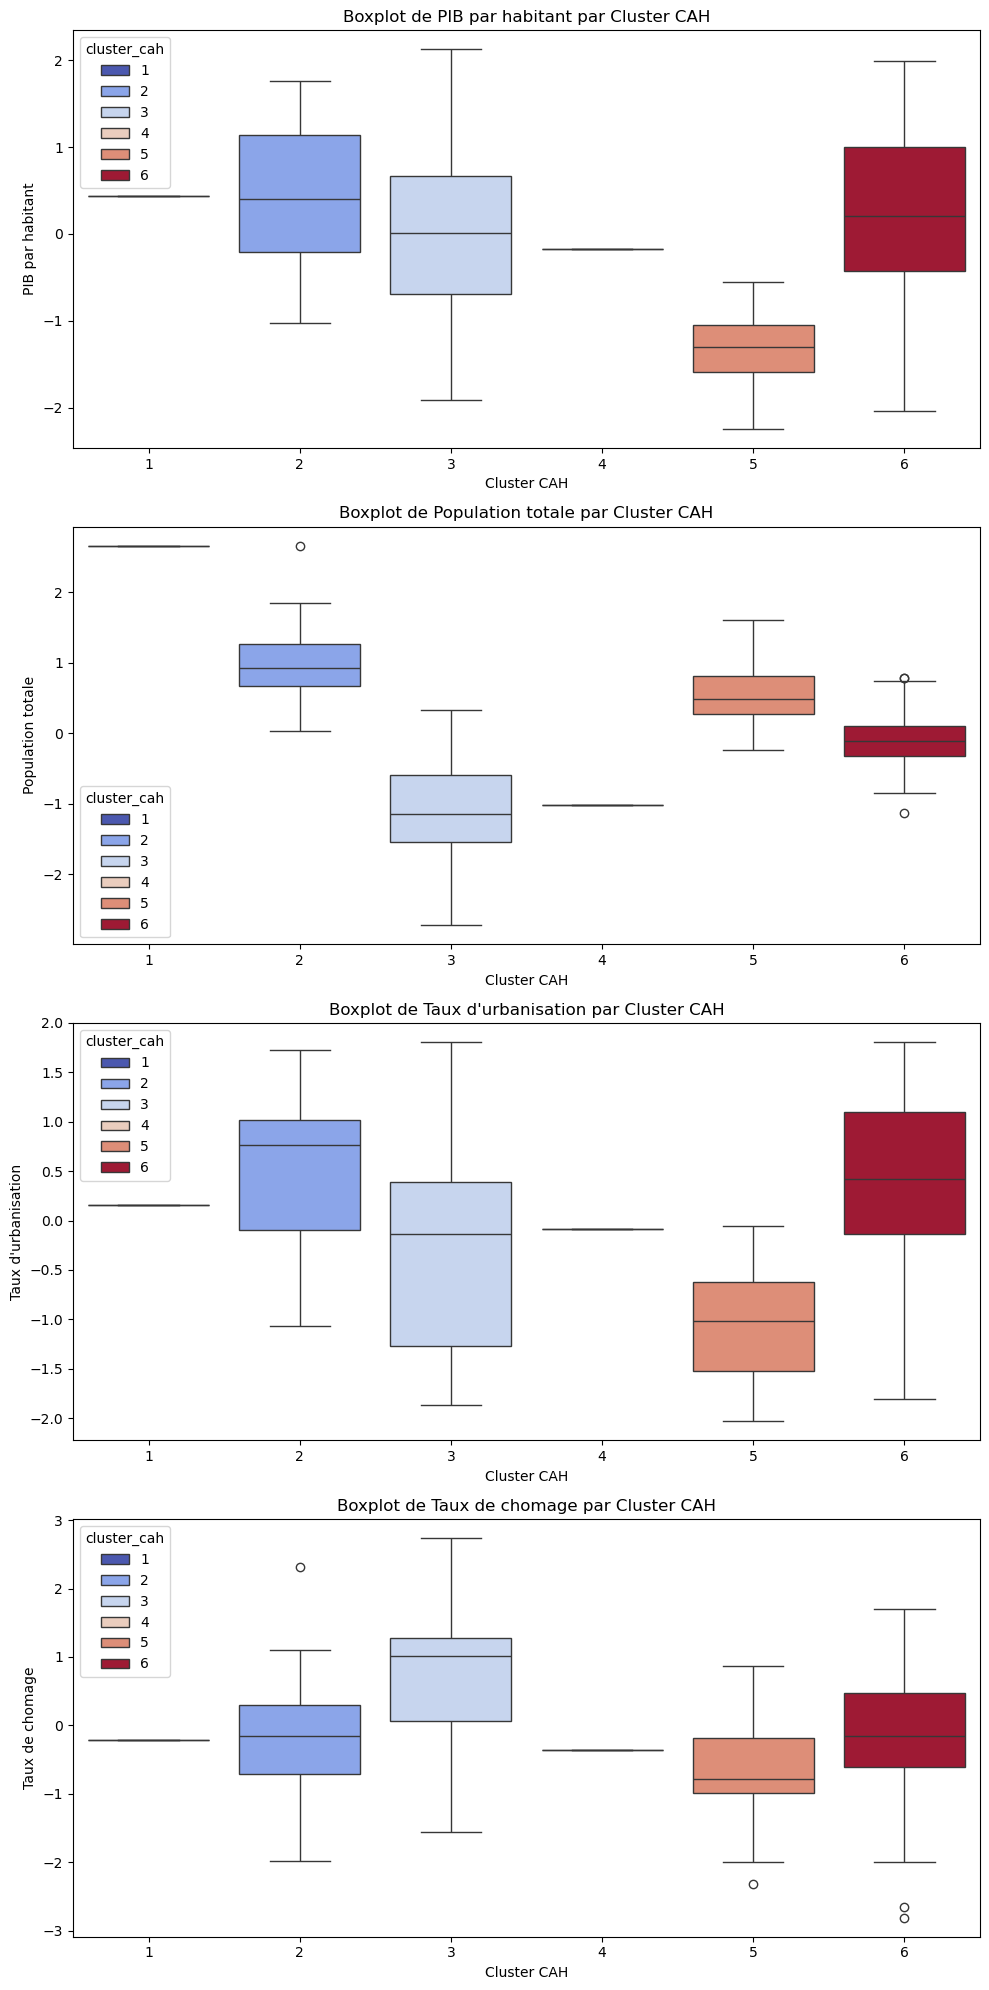

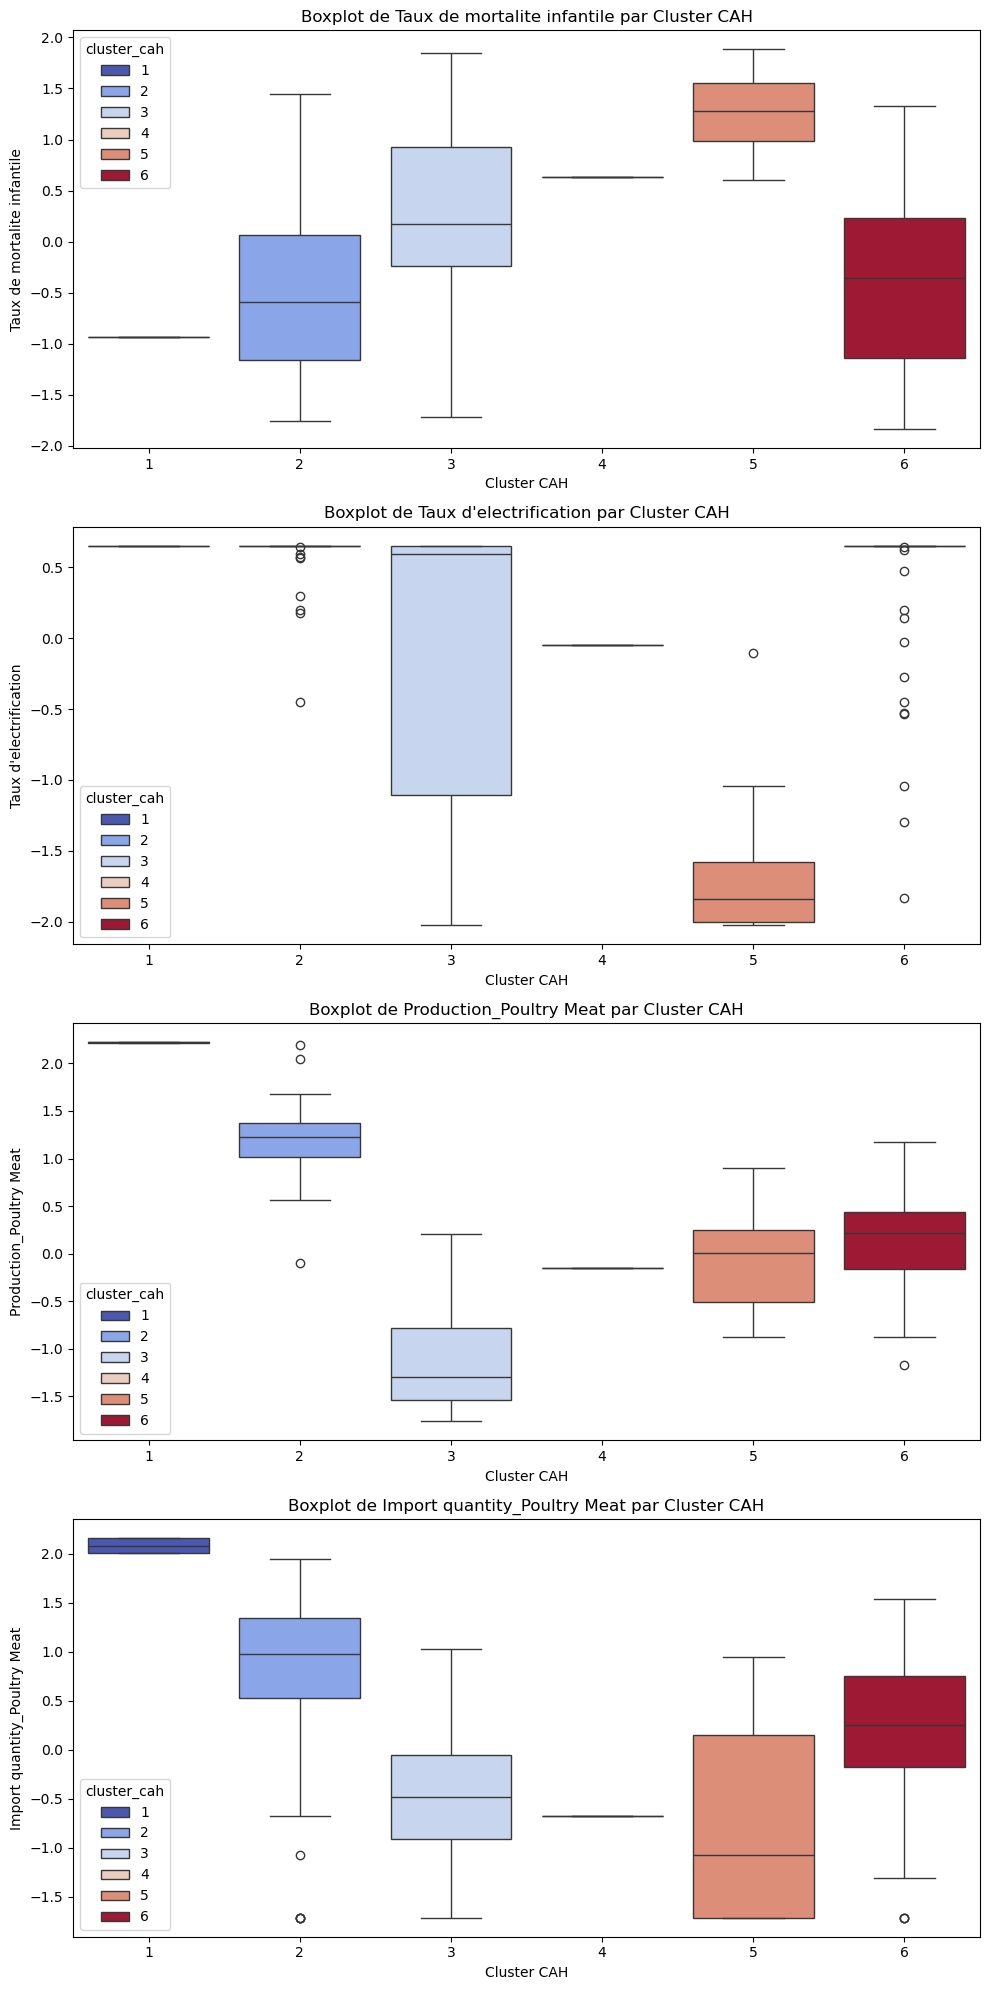

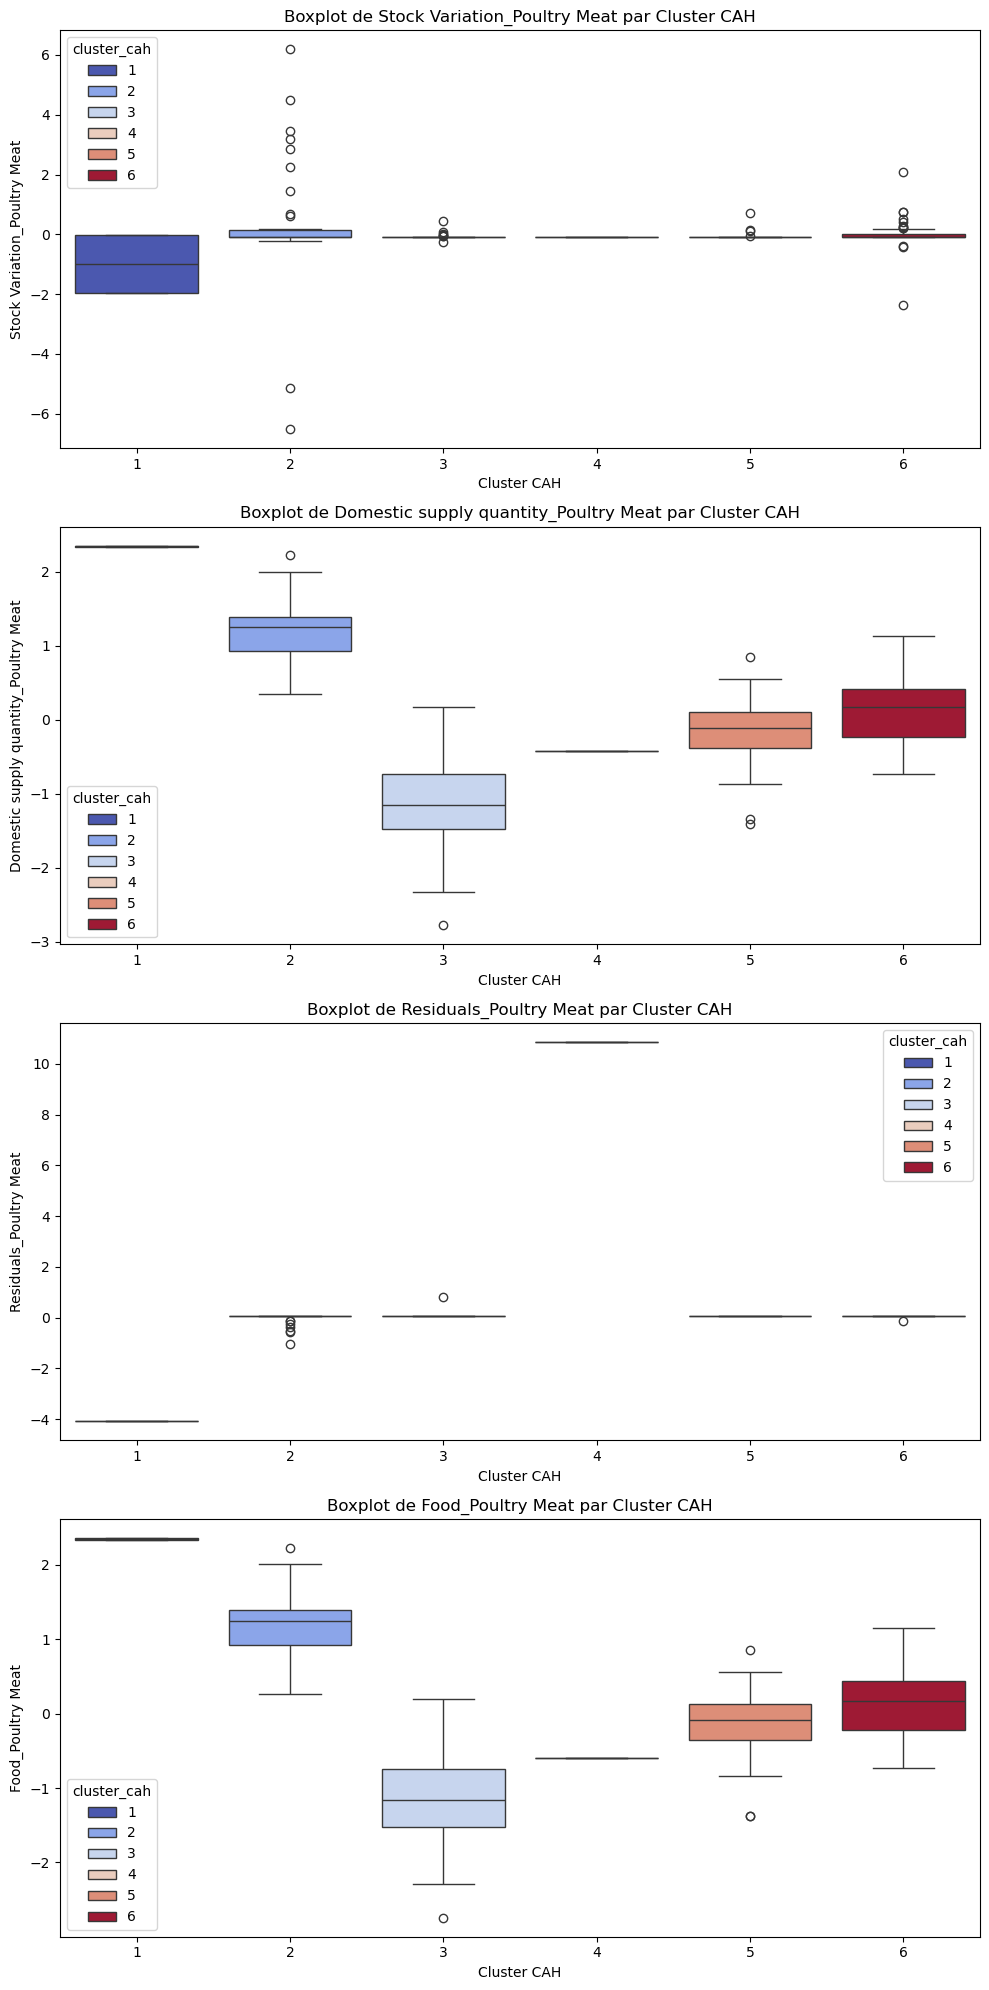

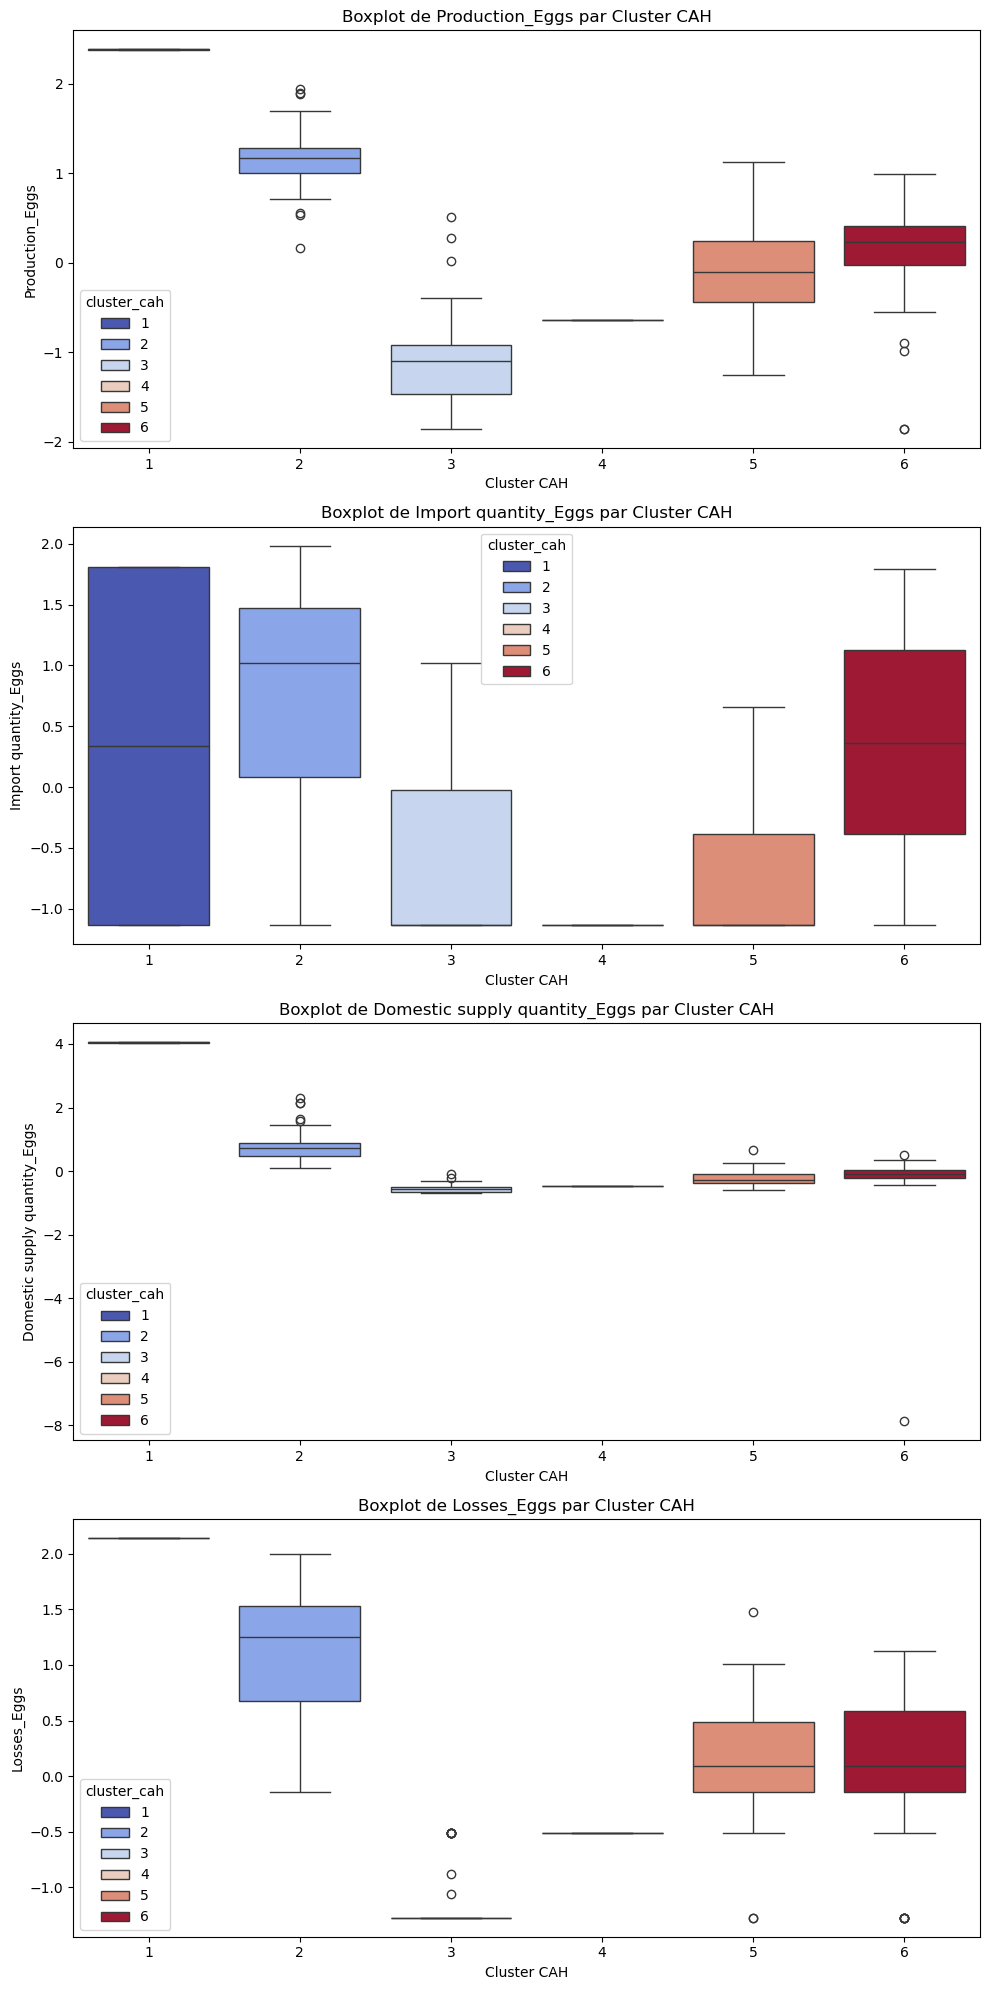

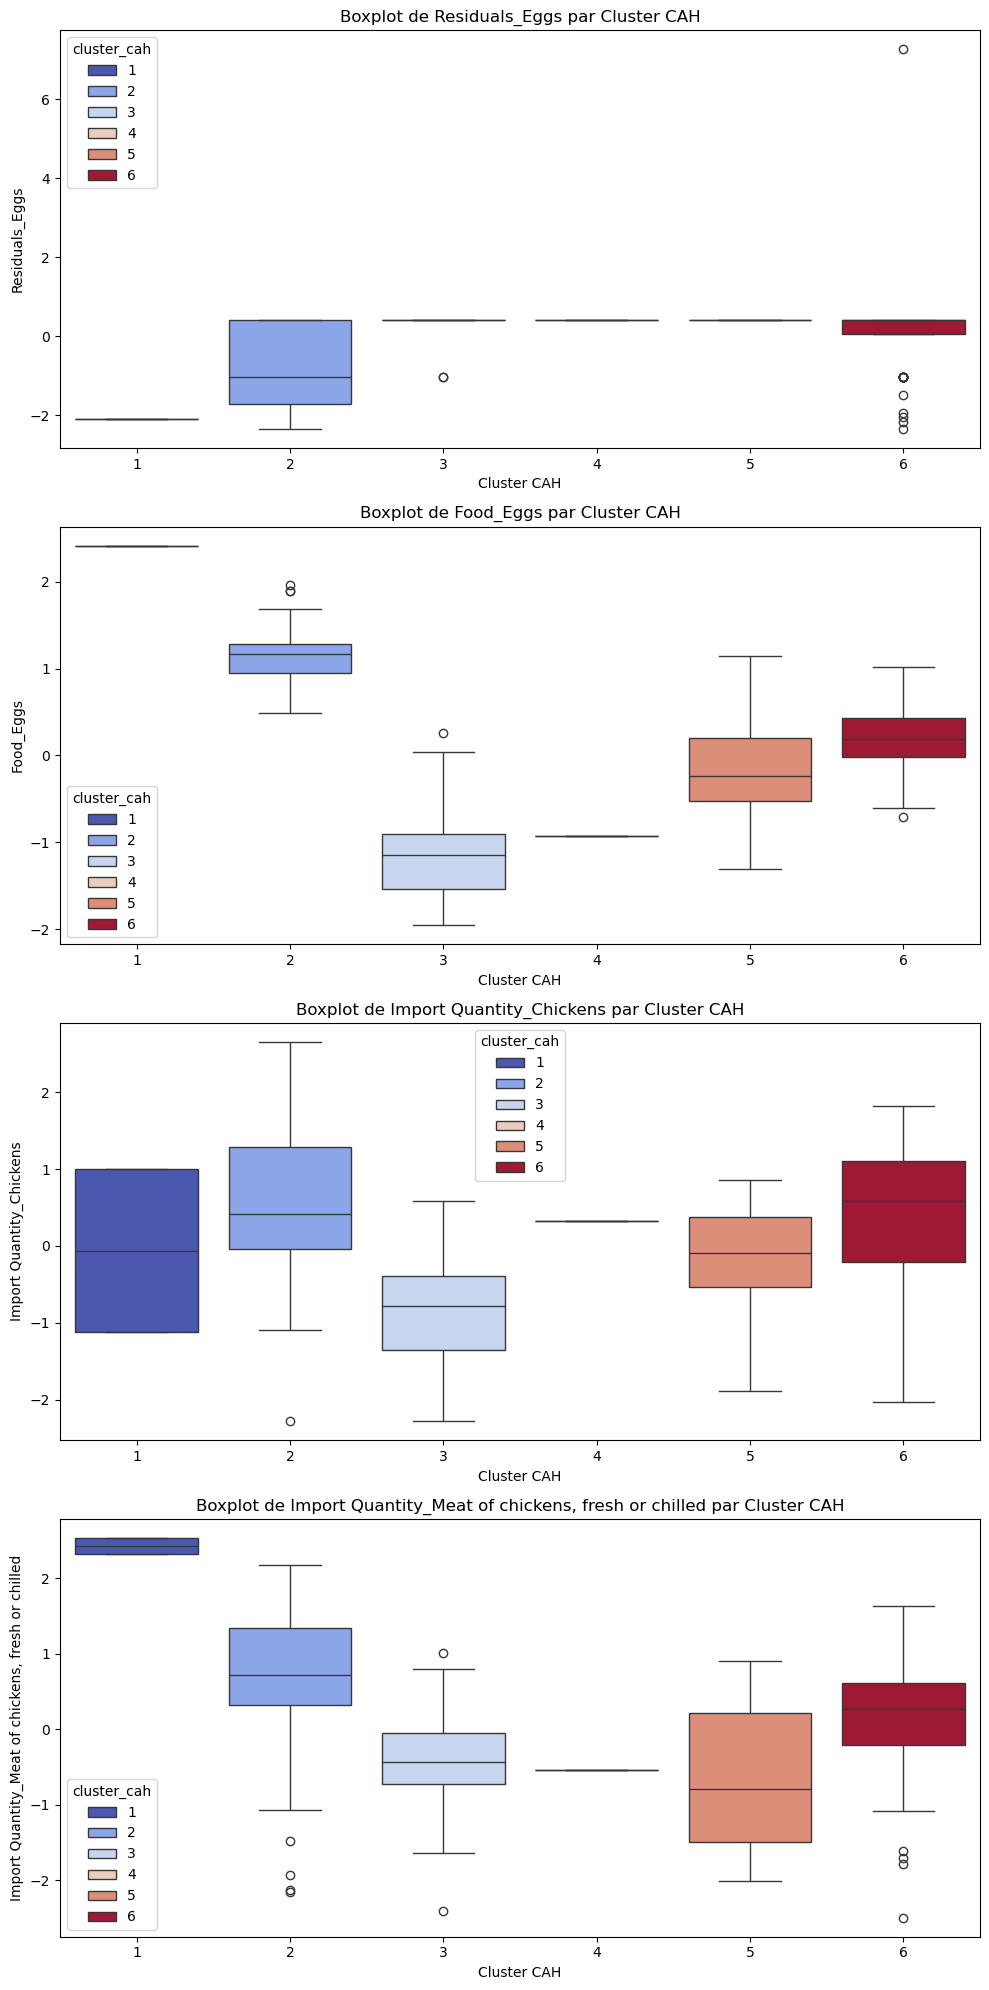

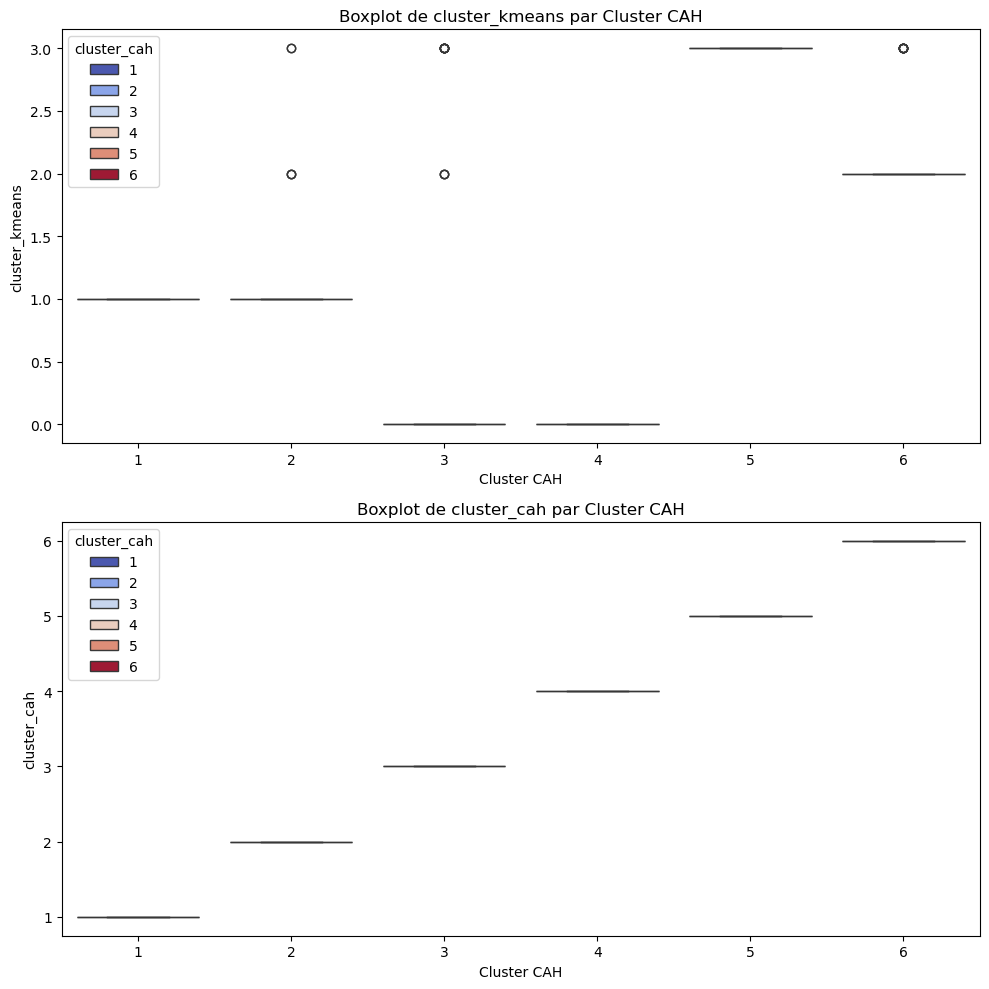

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assumer que 'cluster_cah' est la colonne contenant les clusters CAH dans df_final_scaled

# Sélectionner les colonnes numériques
numeric_columns = df_final_scaled.select_dtypes(include=[np.number]).columns

# Nombre de colonnes par figure
cols_per_fig = 4

# Calculer le nombre de figures nécessaires
num_figs = int(np.ceil(len(numeric_columns) / cols_per_fig))

for i in range(num_figs):
    # Créer une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(
        nrows=min(cols_per_fig, len(numeric_columns) - i * cols_per_fig),
        ncols=1,
        figsize=(10, min(cols_per_fig, len(numeric_columns) - i * cols_per_fig) * 5)
    )
    
    if len(numeric_columns) - i * cols_per_fig == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numeric_columns[i * cols_per_fig:(i + 1) * cols_per_fig]):
        sns.boxplot(
            x='cluster_cah',  # Utiliser les clusters CAH pour les axes x
            y=col,
            data=df_final_scaled,
            hue='cluster_cah',  # Colorier par cluster CAH
            palette='coolwarm',  # Palette de couleurs
            ax=ax
        )
        ax.set_title(f'Boxplot de {col} par Cluster CAH')
        ax.set_xlabel('Cluster CAH')
        ax.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.4 - Correlation</h4>
</div>

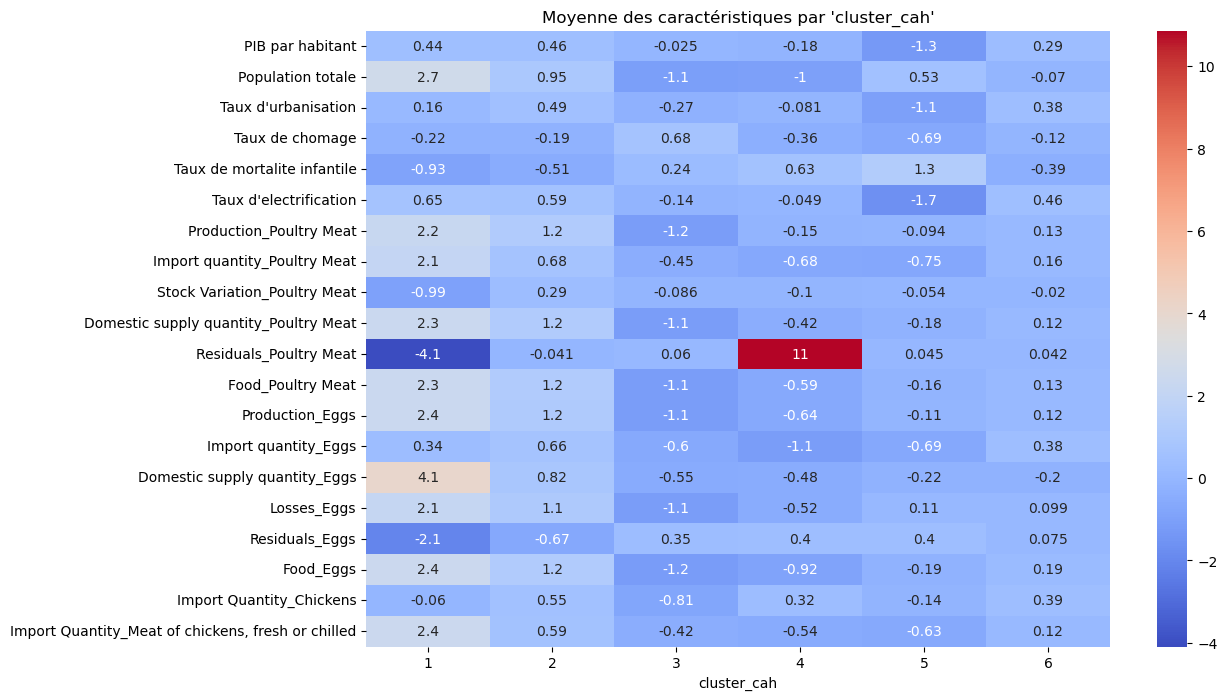

In [62]:
CAH_means_clean = CAH_means.drop(columns=['cluster_cah', 'cluster_kmeans'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(CAH_means_clean.T, annot=True, cmap="coolwarm")
plt.title("Moyenne des caractéristiques par 'cluster_cah'")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.3 - Test kruskal</h4>
</div>

In [63]:
# Test de Kruskal-Wallis pour chaque variable numérique par cluster
kruskal_results = {}
for col in numeric_columns:
    # Groupes de données pour chaque cluster
    groups = [df_final_scaled[df_final_scaled['cluster_cah'] == cluster][col] for cluster in df_final_scaled['cluster_cah'].unique()]
    
    # Effectuer le test Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    kruskal_results[col] = p_value

# Extraire et trier les p-values
sorted_p_values = sorted(kruskal_results.items(), key=lambda item: item[1])

# Afficher les 10 variables avec les p-values les plus faibles
print("Les 10 variables avec les p-values les plus faibles :")
for feature, p_value in sorted_p_values[:10]:
    print(f"{feature}: p-value = {p_value}")


Les 10 variables avec les p-values les plus faibles :
cluster_cah: p-value = 1.709998102284865e-38
Food_Eggs: p-value = 9.634258799261416e-31
Domestic supply quantity_Eggs: p-value = 2.76938050235246e-30
Domestic supply quantity_Poultry Meat: p-value = 3.407120206549982e-29
Production_Poultry Meat: p-value = 5.308959632316442e-29
Food_Poultry Meat: p-value = 6.483647677662089e-29
Production_Eggs: p-value = 1.4647999342661277e-28
cluster_kmeans: p-value = 1.167350713565123e-27
Population totale: p-value = 1.513460258188332e-27
Losses_Eggs: p-value = 3.8509802159275563e-26


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.4 - Pays par groupe</h4>
</div>

In [63]:
# Grouper les données par 'cluster_cah' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('cluster_cah')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster cah', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster cah,Areas (Pays/Régions)
0,1,"china, china, china, china"
1,2,"argentina, bangladesh, belgium, brazil, canada, chile, colombia, egypt, arab rep., france, germany, guatemala, india, indonesia, iran, islamic rep., italy, japan, kazakhstan, korea, rep., malaysia, mexico, morocco, netherlands, pakistan, peru, philippines, poland, portugal, romania, russian federation, saudi arabia, south africa, spain, thailand, türkiye, ukraine, united arab emirates, united kingdom, united states, viet nam"
2,3,"antigua and barbuda, armenia, bahamas, the, barbados, belize, bhutan, botswana, cabo verde, central african republic, comoros, congo, rep., cyprus, djibouti, dominica, eswatini, french polynesia, gabon, gambia, the, grenada, guinea-bissau, guyana, haiti, iceland, kiribati, lesotho, luxembourg, maldives, malta, mauritania, mauritius, mongolia, montenegro, namibia, nauru, new caledonia, north macedonia, norway, rwanda, samoa, sao tome and principe, seychelles, solomon islands, somalia, south sudan, st. kitts and nevis, st. lucia, st. vincent and the grenadines, suriname, timor-leste, tonga, tuvalu, vanuatu"
3,4,fiji
4,5,"benin, burkina faso, burundi, cameroon, chad, cote d'ivoire, democratic republic of the congo, ethiopia, guinea, kenya, liberia, madagascar, malawi, mali, mozambique, myanmar, nepal, niger, nigeria, papua new guinea, senegal, sierra leone, sudan, togo, uganda, united republic of tanzania, zambia, zimbabwe"
5,6,"afghanistan, albania, algeria, angola, australia, austria, azerbaijan, bahrain, belarus, bolivia, bosnia and herzegovina, bulgaria, cambodia, china, hong kong sar, china, macao sar, costa rica, croatia, cuba, czechia, denmark, dominican republic, ecuador, el salvador, estonia, finland, georgia, ghana, greece, honduras, hungary, iraq, ireland, israel, jamaica, jordan, kuwait, kyrgyz republic, lao people's democratic republic, latvia, lebanon, libya, lithuania, moldova, new zealand, nicaragua, oman, panama, paraguay, qatar, serbia, slovak republic, slovenia, sri lanka, sweden, switzerland, syrian arab republic, tajikistan, trinidad and tobago, tunisia, turkmenistan, uruguay, uzbekistan, venezuela, rb, yemen, rep."


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5 - Conclusion et recommandations</h2>
</div>